In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score,classification_report,precision_score,recall_score,roc_curve, auc,accuracy_score

Dataset Description:
This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database.

### DR_NO
Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

### Date Rptd
MM/DD/YYYY

### DATE OCC
MM/DD/YYYY

### TIME OCC
In 24 hour military time.

### AREA
The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

### AREA NAME
The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

### Rpt Dist No
A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4

### Part 1-2
Number

### Crm Cd
Indicates the crime committed. (Same as Crime Code 1)

### Crm Cd Desc
Defines the Crime Code provided.

### Mocodes
Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

### Vict Age
Two character numeric

### Vict Sex
F - Female M - Male X - Unknown

### Vict Descent
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Premis Cd
The type of structure, vehicle, or location where the crime took place.

### Premis Desc
Defines the Premise Code provided.

### Weapon Used Cd
The type of weapon used in the crime.

### Weapon Desc
Defines the Weapon Used Code provided.
### Status
Status of the case. (IC is the default)

### Status Desc
Defines the Status Code provided.#

### Crm Cd 1
Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

### Crm Cd 2
May contain a code for an additional crime, less serious than Crime Code 1.

### Crm Cd 3
May contain a code for an additional crime, less serious than Crime Code 1.

### Crm Cd 4
May contain a code for an additional crime, less serious than Crime Code 1.

### LOCATION
Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

### Cross Street
Cross Street of rounded Address

### LAT
Latitude

### LON
Longtitude


"Part 1-2" refers to a classification within the dataset that distinguishes between different types of crimes. It's essentially a way to categorize crimes based on their severity or seriousness.

Here's a simplified description of the columns in the dataset:

- *DR_NO*: A unique number assigned to each reported crime, composed of the year, area ID, and digits.
- *Date Rptd*: The date when the crime was reported, in the format MM/DD/YYYY.
- *DATE OCC*: The date when the crime occurred, in the format MM/DD/YYYY.
- *TIME OCC*: The time when the crime occurred, using 24-hour military time.
- *AREA*: The geographical area within the LAPD's jurisdiction where the crime occurred.
- *AREA NAME*: The name designation of the geographical area.
- *Rpt Dist No*: A code representing a sub-area within the geographical area.
- *Crm Cd*: A code indicating the type of crime committed.
- *Crm Cd Desc*: Description of the crime code.
- *Mocodes*: Modus Operandi, which describes the activities associated with the suspect during the crime.
- *Vict Age*: Age of the victim.
- *Vict Sex*: Gender of the victim (Female, Male, or Unknown).
- *Vict Descent*: Ethnicity or descent of the victim.
- *Premis Cd*: Code indicating the type of location where the crime took place.
- *Premis Desc*: Description of the premise code.
- *Weapon Used Cd*: Code indicating the type of weapon used in the crime.
- *Weapon Desc*: Description of the weapon used.
- *Status*: Status of the case.
- *Status Desc*: Description of the status code.
- *Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4*: Codes indicating additional crimes, if any, less serious than the primary crime.
- *LOCATION*: Approximate street address of the crime incident, rounded to the nearest hundred block for privacy.
- *Cross Street*: Cross street of the rounded address.
- *LAT*: Latitude coordinates of the crime location.
- *LON*: Longitude coordinates of the crime location.

In [4]:
data = pd.read_csv("Crime_Data_from_2020_to_Present_20240501.csv")
data.head()

DR_NO        Date Rptd        DATE OCC  TIME OCC  AREA  AREA NAME   
0  190326475    3/1/2020 0:00   3/1/2020 0:00      2130     7   Wilshire  \
1  200106753    2/9/2020 0:00   2/8/2020 0:00      1800     1    Central   
2  200320258  11/11/2020 0:00  11/4/2020 0:00      1700     3  Southwest   
3  200907217   5/10/2023 0:00  3/10/2020 0:00      2037     9   Van Nuys   
4  220614831   8/18/2022 0:00  8/17/2020 0:00      1200     6  Hollywood   

   Rpt Dist No  Part 1-2  Crm Cd                               Crm Cd Desc   
0          784         1     510                          VEHICLE - STOLEN  \
1          182         1     330                     BURGLARY FROM VEHICLE   
2          356         1     480                             BIKE - STOLEN   
3          964         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4          666         2     354                         THEFT OF IDENTITY   

   ... Status   Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4   
0  ...     AA  Adult Arrest    510.0    998.0       NaN      NaN  \
1  ...     IC   Invest Cont    330.0    998.0       NaN      NaN   
2  ...     IC   Invest Cont    480.0      NaN       NaN      NaN   
3  ...     IC   Invest Cont    343.0      NaN       NaN      NaN   
4  ...     IC   Invest Cont    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [5]:
data.shape

(932140, 28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           932140 non-null  int64  
 1   Date Rptd       932140 non-null  object 
 2   DATE OCC        932140 non-null  object 
 3   TIME OCC        932140 non-null  int64  
 4   AREA            932140 non-null  int64  
 5   AREA NAME       932140 non-null  object 
 6   Rpt Dist No     932140 non-null  int64  
 7   Part 1-2        932140 non-null  int64  
 8   Crm Cd          932140 non-null  int64  
 9   Crm Cd Desc     932140 non-null  object 
 10  Mocodes         801530 non-null  object 
 11  Vict Age        932140 non-null  int64  
 12  Vict Sex        807934 non-null  object 
 13  Vict Descent    807924 non-null  object 
 14  Premis Cd       932130 non-null  float64
 15  Premis Desc     931578 non-null  object 
 16  Weapon Used Cd  321339 non-null  float64
 17  Weapon Des

In [7]:
data.describe()

DR_NO       TIME OCC           AREA    Rpt Dist No   
count  9.321400e+05  932140.000000  932140.000000  932140.000000  \
mean   2.185885e+08    1337.717757      10.711552    1117.594370   
std    1.227977e+07     652.577100       6.100501     610.077215   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.104159e+08     900.000000       6.000000     615.000000   
50%    2.206121e+08    1417.000000      11.000000    1141.000000   
75%    2.306094e+08    1900.000000      16.000000    1617.000000   
max    2.499138e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd   
count  932140.000000  932140.000000  932140.000000  932130.000000  \
mean        1.410221     500.820799      29.544078     306.613841   
std         0.491874     207.444585      21.868290     217.467312   
min         1.000000     110.000000      -4.000000     101.000000   
25%         1.000000     331.000000       0.000000     101.000000   
50%         1.000000     442.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     976.000000   

       Weapon Used Cd       Crm Cd 1      Crm Cd 2     Crm Cd 3   Crm Cd 4   
count   321339.000000  932129.000000  67590.000000  2265.000000   64.00000  \
mean       363.632080     500.565202    958.034694   983.983223  991.21875   
std        123.609686     207.237336    110.396406    51.944671   27.06985   
min        101.000000     110.000000    210.000000   310.000000  821.00000   
25%        311.000000     331.000000    998.000000   998.000000  998.00000   
50%        400.000000     442.000000    998.000000   998.000000  998.00000   
75%        400.000000     626.000000    998.000000   998.000000  998.00000   
max        516.000000     956.000000    999.000000   999.000000  999.00000   

                 LAT            LON  
count  932140.000000  932140.000000  
mean       33.991109    -118.067008  
std         1.680895       5.826718  
min         0.000000    -118.667600  
25%        34.014500    -118.430100  
50%        34.058800    -118.322300  
75%        34.164800    -118.273900  
max        34.334300       0.000000

In [8]:
data.select_dtypes(include='object').columns

Index(['Date Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes',
       'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status',
       'Status Desc', 'LOCATION', 'Cross Street'],
      dtype='object')

In [9]:
data.select_dtypes(include='int64').columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Vict Age'],
      dtype='object')

In [10]:
data.select_dtypes(include='float64').columns

Index(['Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3',
       'Crm Cd 4', 'LAT', 'LON'],
      dtype='object')

In [11]:
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           130610
Vict Age               0
Vict Sex          124206
Vict Descent      124216
Premis Cd             10
Premis Desc          562
Weapon Used Cd    610801
Weapon Desc       610801
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          864550
Crm Cd 3          929875
Crm Cd 4          932076
LOCATION               0
Cross Street      786138
LAT                    0
LON                    0
dtype: int64

In [12]:
data2 = data.copy(deep=True)

In [13]:
data2.head()

DR_NO        Date Rptd        DATE OCC  TIME OCC  AREA  AREA NAME   
0  190326475    3/1/2020 0:00   3/1/2020 0:00      2130     7   Wilshire  \
1  200106753    2/9/2020 0:00   2/8/2020 0:00      1800     1    Central   
2  200320258  11/11/2020 0:00  11/4/2020 0:00      1700     3  Southwest   
3  200907217   5/10/2023 0:00  3/10/2020 0:00      2037     9   Van Nuys   
4  220614831   8/18/2022 0:00  8/17/2020 0:00      1200     6  Hollywood   

   Rpt Dist No  Part 1-2  Crm Cd                               Crm Cd Desc   
0          784         1     510                          VEHICLE - STOLEN  \
1          182         1     330                     BURGLARY FROM VEHICLE   
2          356         1     480                             BIKE - STOLEN   
3          964         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4          666         2     354                         THEFT OF IDENTITY   

   ... Status   Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4   
0  ...     AA  Adult Arrest    510.0    998.0       NaN      NaN  \
1  ...     IC   Invest Cont    330.0    998.0       NaN      NaN   
2  ...     IC   Invest Cont    480.0      NaN       NaN      NaN   
3  ...     IC   Invest Cont    343.0      NaN       NaN      NaN   
4  ...     IC   Invest Cont    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [14]:
data2.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [15]:
data2['Vict Descent'].fillna('N/A', inplace=True)
data2['Premis Cd'].fillna(0.0, inplace=True)
data2['Premis Desc'].fillna('Not mentioned', inplace=True)
mode_age = data2['Vict Age'].mode()[0]
data2['Vict Age'] = data2['Vict Age'].replace(0, mode_age)


In [16]:
data2 = data2.drop(['DR_NO', 'Mocodes', 'Vict Sex', 'Cross Street', 'Status Desc','Weapon Used Cd','Weapon Desc'], axis=1)

In [17]:
data2.isna().sum()

Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Vict Age             0
Vict Descent         0
Premis Cd            0
Premis Desc          0
Status               0
Crm Cd 1            11
Crm Cd 2        864550
Crm Cd 3        929875
Crm Cd 4        932076
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date Rptd     932140 non-null  object 
 1   DATE OCC      932140 non-null  object 
 2   TIME OCC      932140 non-null  int64  
 3   AREA          932140 non-null  int64  
 4   AREA NAME     932140 non-null  object 
 5   Rpt Dist No   932140 non-null  int64  
 6   Part 1-2      932140 non-null  int64  
 7   Crm Cd        932140 non-null  int64  
 8   Crm Cd Desc   932140 non-null  object 
 9   Vict Age      932140 non-null  int64  
 10  Vict Descent  932140 non-null  object 
 11  Premis Cd     932140 non-null  float64
 12  Premis Desc   932140 non-null  object 
 13  Status        932140 non-null  object 
 14  Crm Cd 1      932129 non-null  float64
 15  Crm Cd 2      67590 non-null   float64
 16  Crm Cd 3      2265 non-null    float64
 17  Crm Cd 4      64 non-null      float64
 18  LOCA

In [19]:
data2['Part 1-2'].value_counts()

Part 1-2
1    549757
2    382383
Name: count, dtype: int64

In [20]:
most_sensi_df = data2[data2[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].notnull().all(axis=1)]

In [21]:
most_sensi_df.head()

Date Rptd         DATE OCC  TIME OCC  AREA  AREA NAME   
2195   12/21/2020 0:00  12/21/2020 0:00       300     6  Hollywood  \
4115    5/25/2020 0:00   5/24/2020 0:00      2330    20    Olympic   
27493    8/5/2020 0:00    8/5/2020 0:00      1200    16   Foothill   
36570   2/14/2020 0:00   2/14/2020 0:00      2350     6  Hollywood   
37543   5/10/2020 0:00   5/10/2020 0:00        10     6  Hollywood   

       Rpt Dist No  Part 1-2  Crm Cd      Crm Cd Desc  Vict Age  ...   
2195           668         1     761  BRANDISH WEAPON        51  ...  \
4115          2005         1     820  ORAL COPULATION        26  ...   
27493         1655         1     310         BURGLARY        49  ...   
36570          678         1     761  BRANDISH WEAPON        25  ...   
37543          643         1     761  BRANDISH WEAPON        26  ...   

      Premis Cd                                   Premis Desc Status Crm Cd 1   
2195      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     AA    753.0  \
4115      301.0                                   GAS STATION     IC    210.0   
27493     501.0                        SINGLE FAMILY DWELLING     AA    310.0   
36570     502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     AA    753.0   
37543     502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     AA    626.0   

       Crm Cd 2  Crm Cd 3  Crm Cd 4                                  LOCATION   
2195      761.0     930.0     998.0   5600    FERNWOOD                     AV  \
4115      820.0     910.0     998.0   4600    MELROSE                      AV   
27493     888.0     933.0     998.0  10800    STALLION RANCH               RD   
36570     761.0     930.0     998.0   4700    MARATHON                     ST   
37543     761.0     930.0     998.0   1600 N  MARTEL                       AV   

           LAT       LON  
2195   34.0958 -118.3110  
4115   34.0836 -118.3011  
27493  34.2571 -118.3608  
36570  34.0850 -118.3022  
37543  34.0998 -118.3502  

[5 rows x 21 columns]

In [22]:
sensi_df = data2[data2[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3']].notnull().all(axis=1)]

In [23]:
sensi_df.head()

Date Rptd         DATE OCC  TIME OCC  AREA  AREA NAME   
871    6/16/2022 0:00   6/15/2020 0:00      2000    11  Northeast  \
1336   7/25/2022 0:00    1/1/2020 0:00         1    13     Newton   
2195  12/21/2020 0:00  12/21/2020 0:00       300     6  Hollywood   
3216   3/31/2020 0:00   3/30/2020 0:00       850    21    Topanga   
3641   11/2/2020 0:00   11/1/2020 0:00      2300    18  Southeast   

      Rpt Dist No  Part 1-2  Crm Cd                            Crm Cd Desc   
871          1132         1     815    SEXUAL PENETRATION W/FOREIGN OBJECT  \
1336         1371         1     121                         RAPE, FORCIBLE   
2195          668         1     761                        BRANDISH WEAPON   
3216         2158         1     310                               BURGLARY   
3641         1862         1     236  INTIMATE PARTNER - AGGRAVATED ASSAULT   

      Vict Age  ... Premis Cd                                   Premis Desc   
871          8  ...     109.0                               PARK/PLAYGROUND  \
1336         9  ...     501.0                        SINGLE FAMILY DWELLING   
2195        51  ...     502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
3216        47  ...     702.0                        OFFICE BUILDING/OFFICE   
3641        47  ...     501.0                        SINGLE FAMILY DWELLING   

     Status Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4   
871      IC    812.0     814.0     815.0       NaN  \
1336     IC    121.0     812.0     998.0       NaN   
2195     AA    753.0     761.0     930.0     998.0   
3216     AA    310.0     480.0     998.0       NaN   
3641     AA    236.0     434.0     998.0       NaN   

                                      LOCATION      LAT       LON  
871    3400    RIVERSIDE                    DR  34.1161 -118.2710  
1336    100 W  56TH                         ST  33.9915 -118.2739  
2195   5600    FERNWOOD                     AV  34.0958 -118.3110  
3216  21300    VICTORY                      BL  34.1884 -118.5959  
3641    300 W  118TH                        PL  33.9256 -118.2782  

[5 rows x 21 columns]

In [24]:
data_num = data2.select_dtypes(include=['int64','float64'])
data_num.head()

TIME OCC  AREA  Rpt Dist No  Part 1-2  Crm Cd  Vict Age  Premis Cd   
0      2130     7          784         1     510        37      101.0  \
1      1800     1          182         1     330        47      128.0   
2      1700     3          356         1     480        19      502.0   
3      2037     9          964         1     343        19      405.0   
4      1200     6          666         2     354        28      102.0   

   Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4      LAT       LON  
0     510.0     998.0       NaN       NaN  34.0375 -118.3506  
1     330.0     998.0       NaN       NaN  34.0444 -118.2628  
2     480.0       NaN       NaN       NaN  34.0210 -118.3002  
3     343.0       NaN       NaN       NaN  34.1576 -118.4387  
4     354.0       NaN       NaN       NaN  34.0944 -118.3277

array([[<Axes: title={'center': 'TIME OCC'}>,
        <Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'Rpt Dist No'}>,
        <Axes: title={'center': 'Part 1-2'}>],
       [<Axes: title={'center': 'Crm Cd'}>,
        <Axes: title={'center': 'Vict Age'}>,
        <Axes: title={'center': 'Premis Cd'}>,
        <Axes: title={'center': 'Crm Cd 1'}>],
       [<Axes: title={'center': 'Crm Cd 2'}>,
        <Axes: title={'center': 'Crm Cd 3'}>,
        <Axes: title={'center': 'Crm Cd 4'}>,
        <Axes: title={'center': 'LAT'}>],
       [<Axes: title={'center': 'LON'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

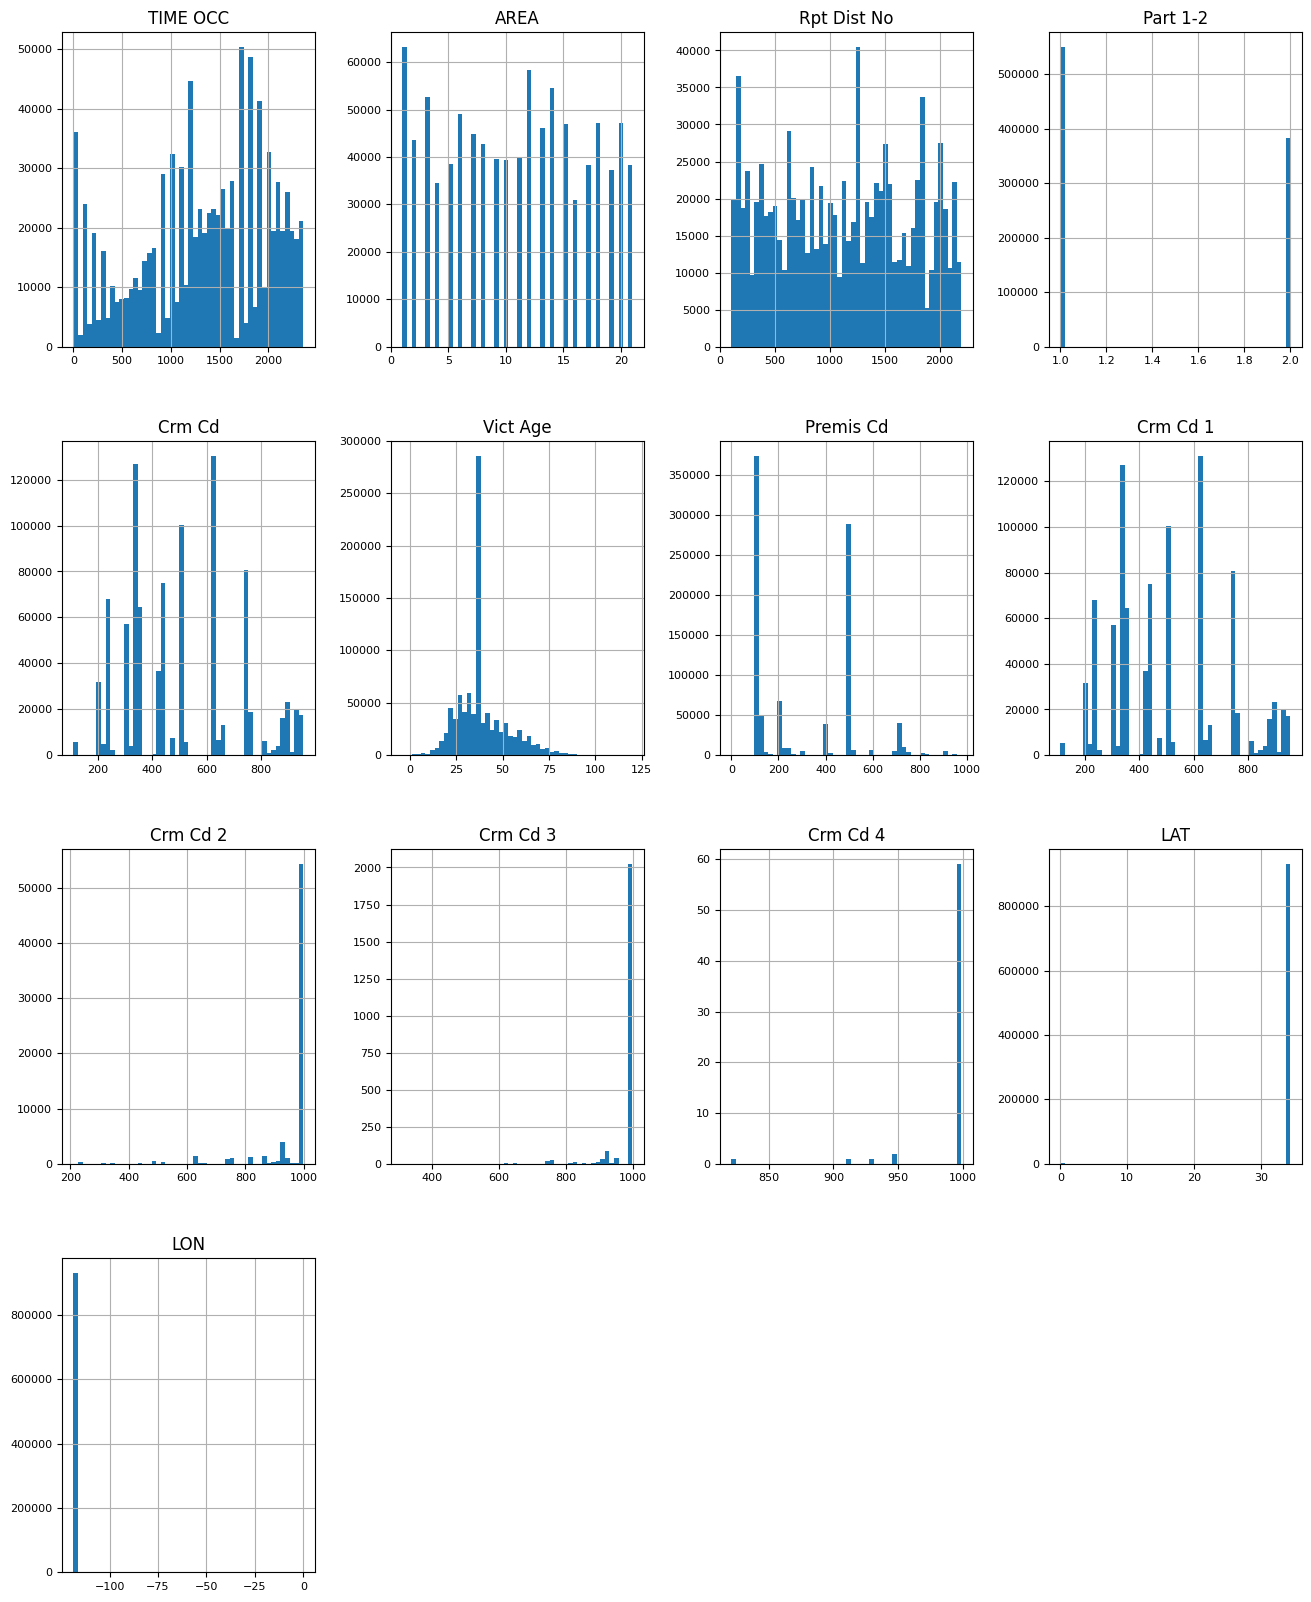

In [25]:
data_num.hist(figsize=(16,20), bins=50, xlabelsize=8,ylabelsize=8)

In [26]:
data2['DATE OCC'] = data2['DATE OCC'].str.replace(' 0:00', '')

In [27]:
data2['DATE OCC'] = pd.to_datetime(data2['DATE OCC'], format='%m/%d/%Y')
data2['TIME OCC'] = data2['TIME OCC'].astype(str)
data2['TIME OCC'] = data2['TIME OCC'].apply(lambda x: x.zfill(4))
data2['TIME OCC'] = data2['TIME OCC'].apply(lambda x: f"{x[:2]}:{x[2:]}")
data2['TIME OCC'] = pd.to_datetime(data2['TIME OCC'], format='%H:%M').dt.time

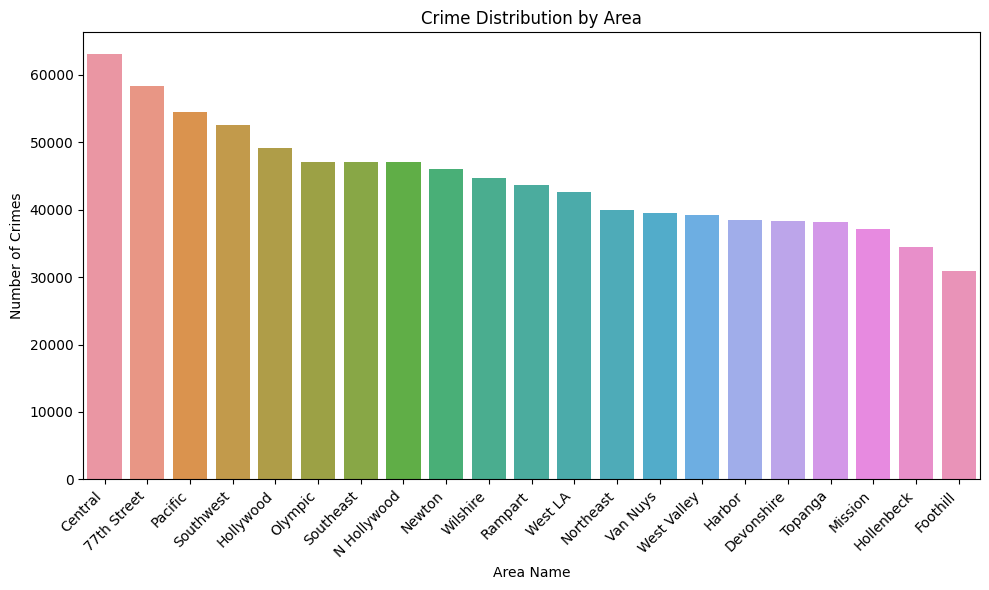

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='AREA NAME', order=data2['AREA NAME'].value_counts().index)
plt.title('Crime Distribution by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

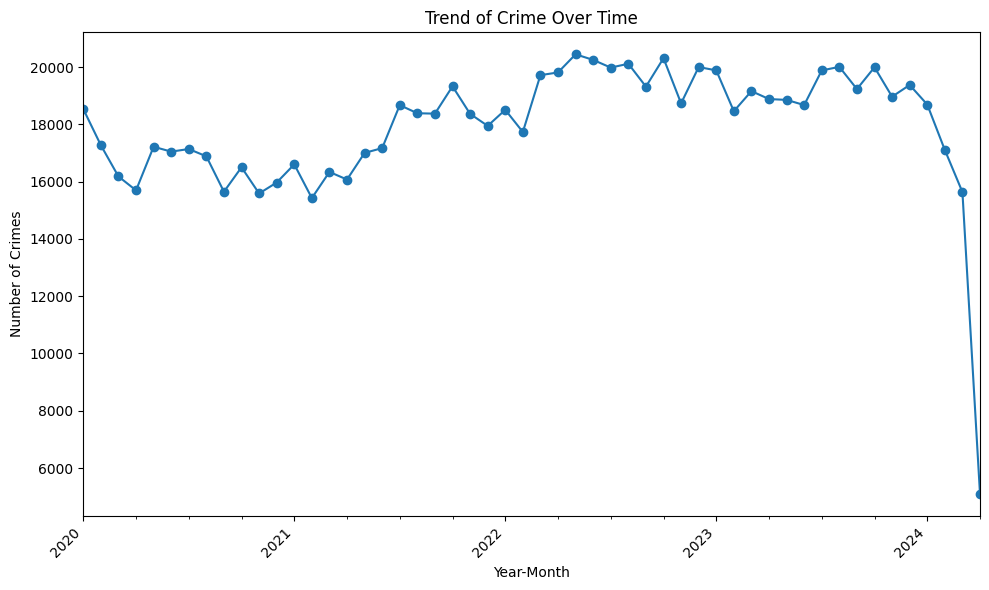

In [29]:
plt.figure(figsize=(10, 6))
data2['DATE OCC'] = pd.to_datetime(data2['DATE OCC'])
crime_trend = data2.groupby(data2['DATE OCC'].dt.to_period('M')).size()
crime_trend.plot(marker='o')
plt.title('Trend of Crime Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

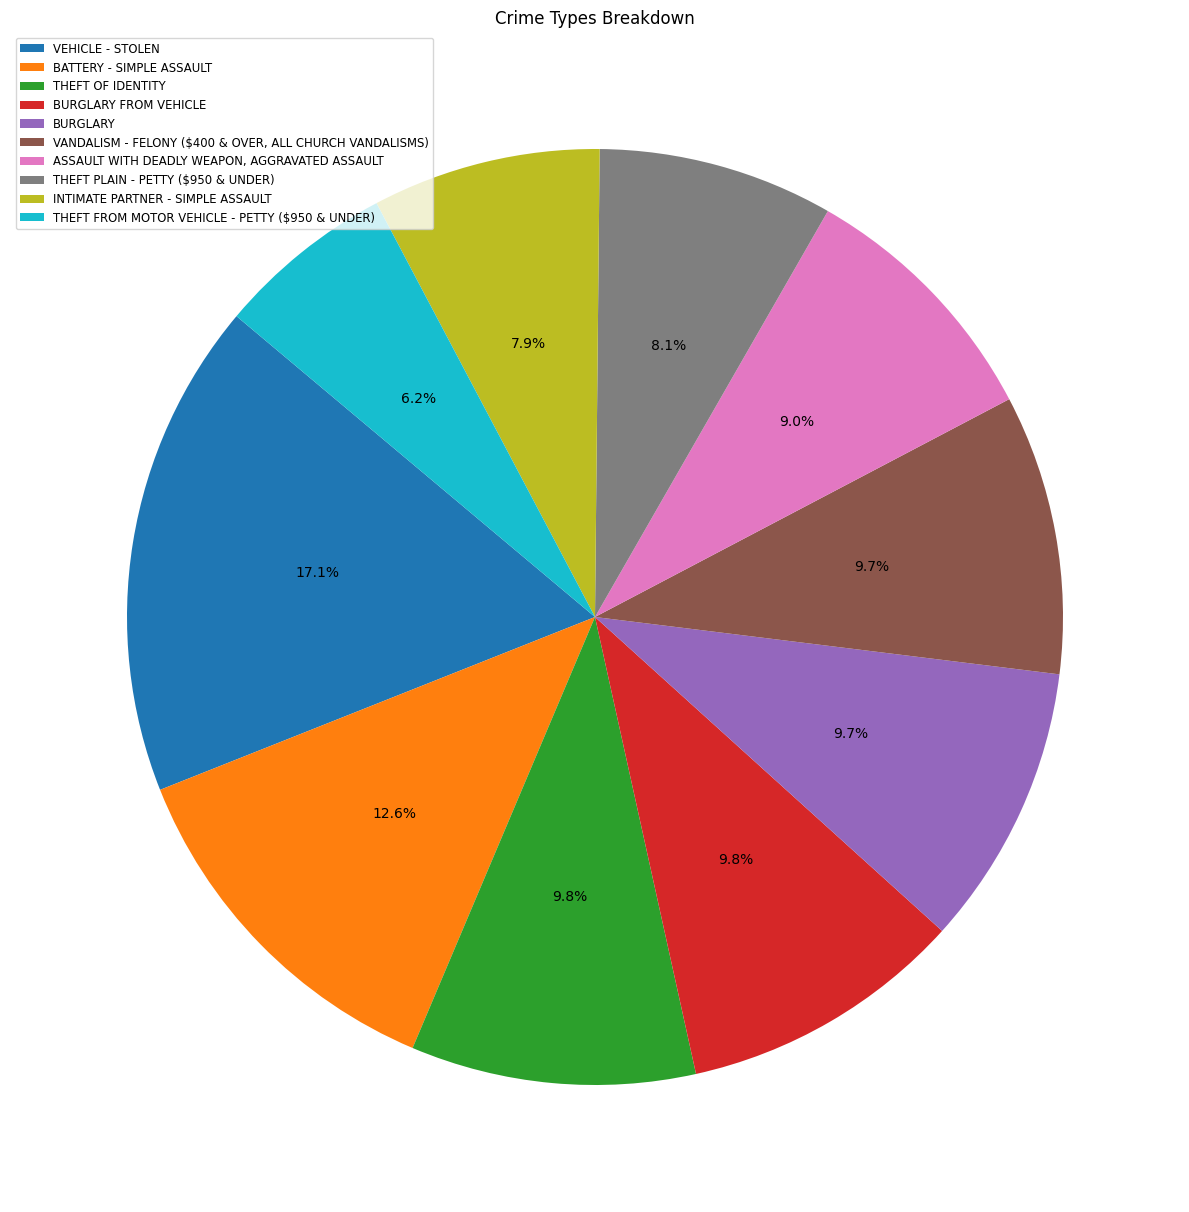

In [30]:
plt.figure(figsize=(12, 18))
crime_type_counts = data2['Crm Cd Desc'].value_counts().head(10)
plt.pie(crime_type_counts, autopct='%1.1f%%', startangle=140)
plt.title('Crime Types Breakdown')
plt.legend(crime_type_counts.index,fontsize='small',loc='upper left')
plt.tight_layout()
plt.show()

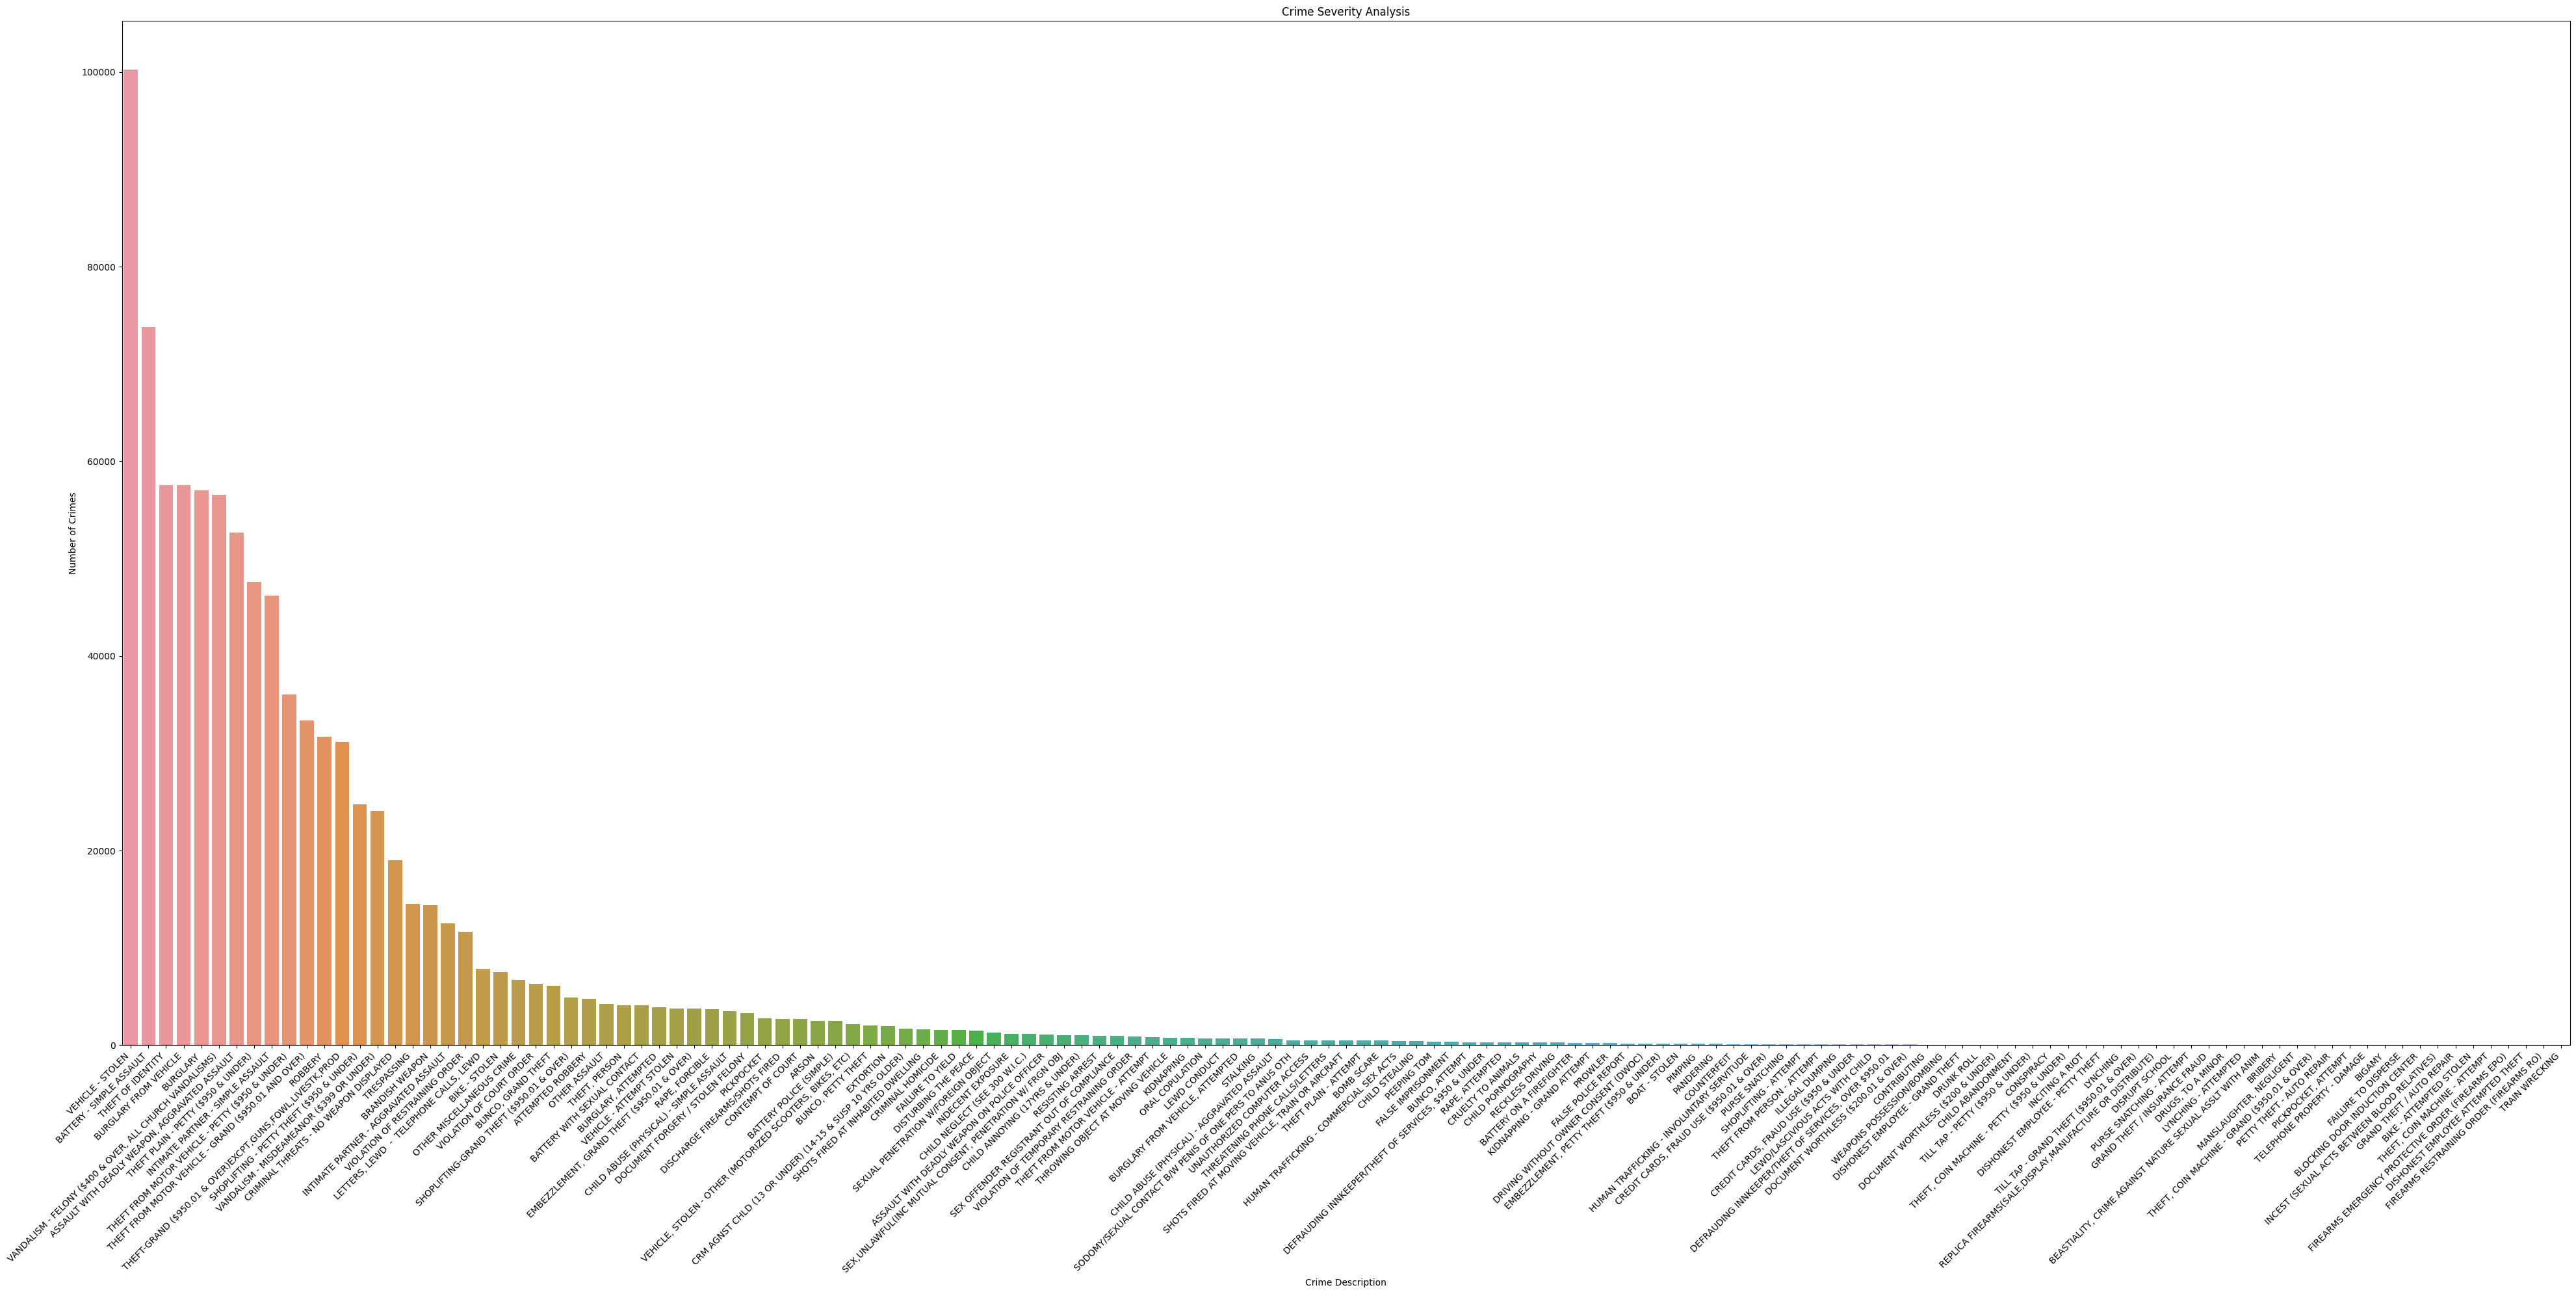

In [31]:
plt.figure(figsize=(40, 20))
sns.countplot(data=data2, x='Crm Cd Desc', order=data2['Crm Cd Desc'].value_counts().index)
plt.title('Crime Severity Analysis')
plt.xlabel('Crime Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

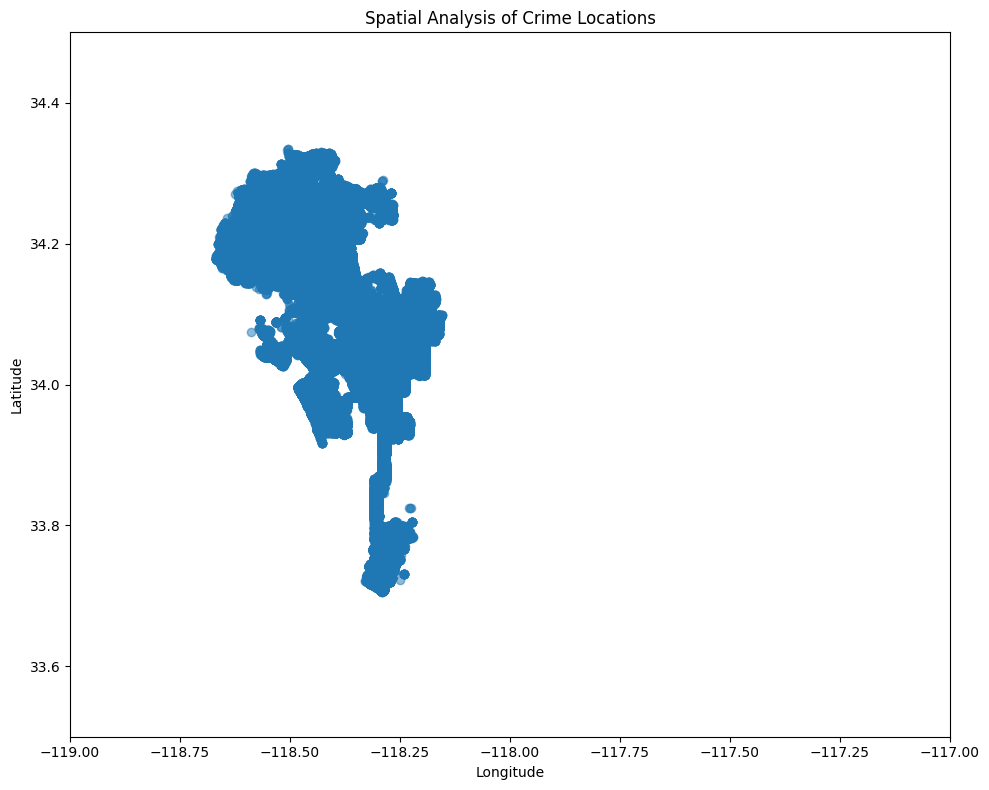

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(data2['LON'], data2['LAT'], alpha=0.5)
plt.title('Spatial Analysis of Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-119, -117)
plt.ylim(33.50, 34.50)
plt.tight_layout()
plt.show()

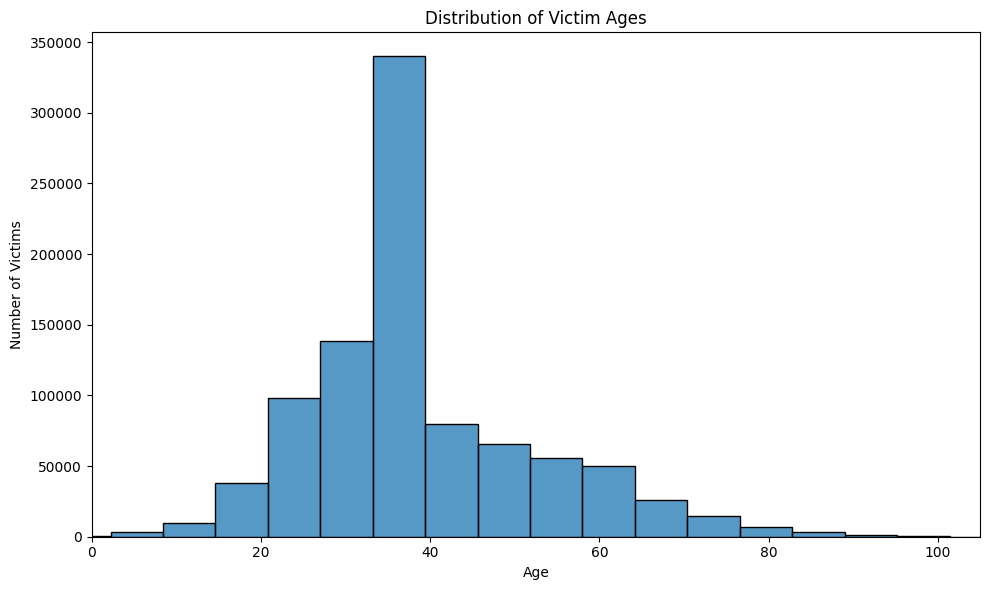

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x='Vict Age', bins=20)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

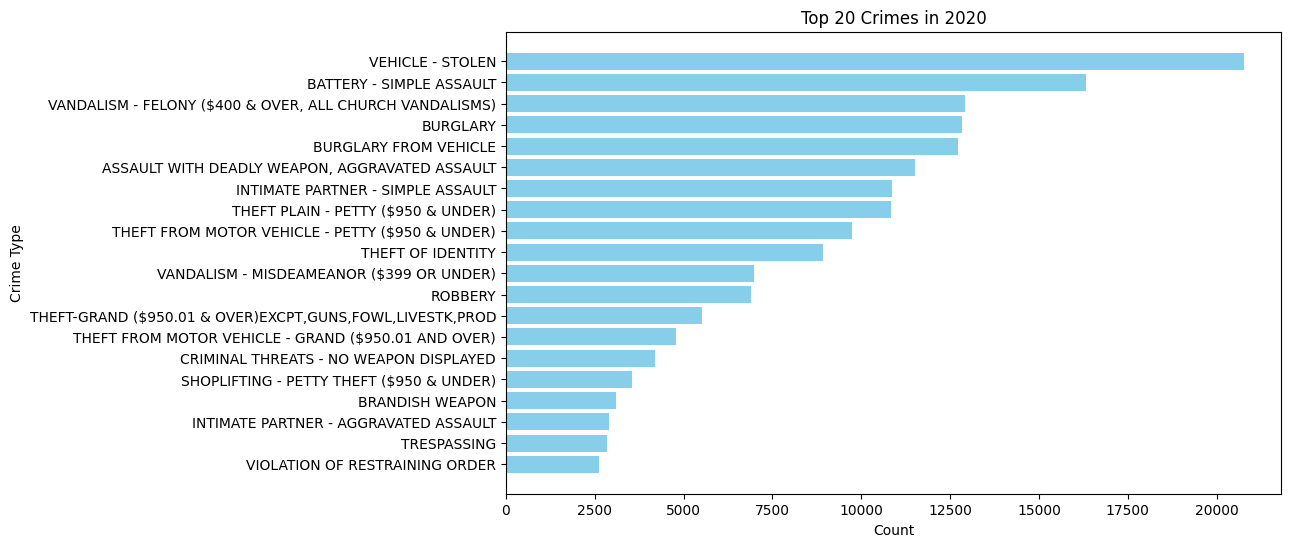

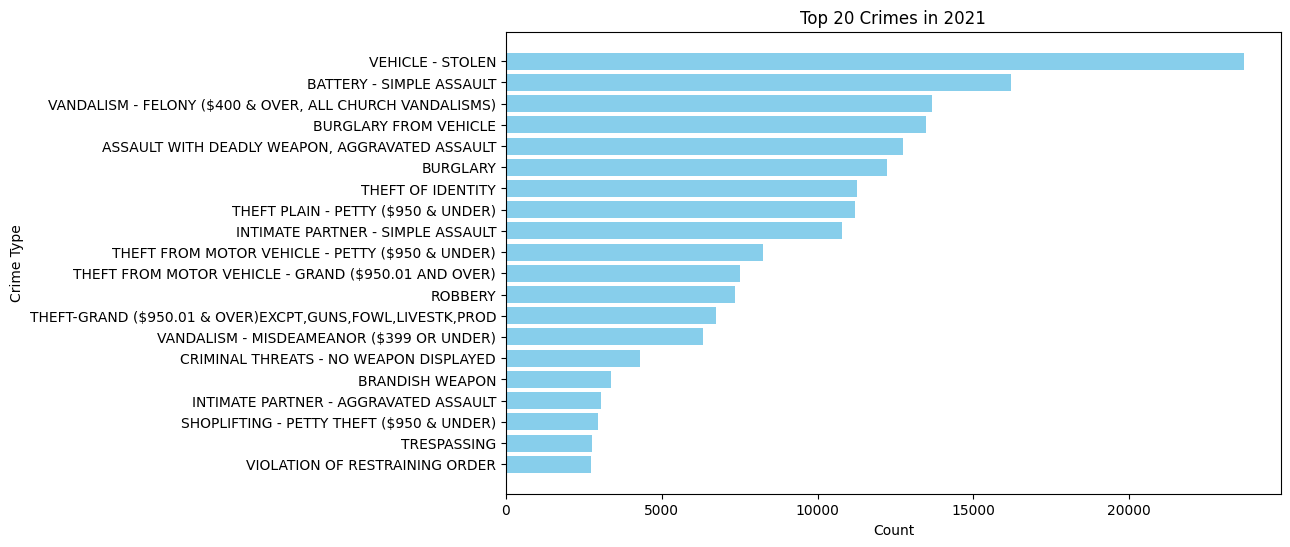

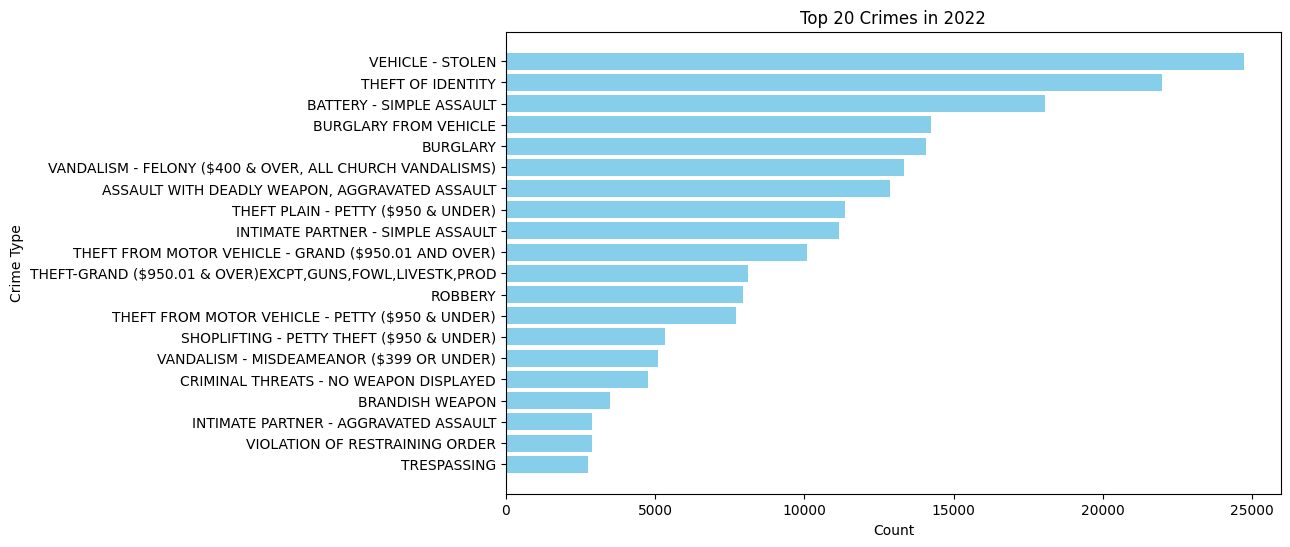

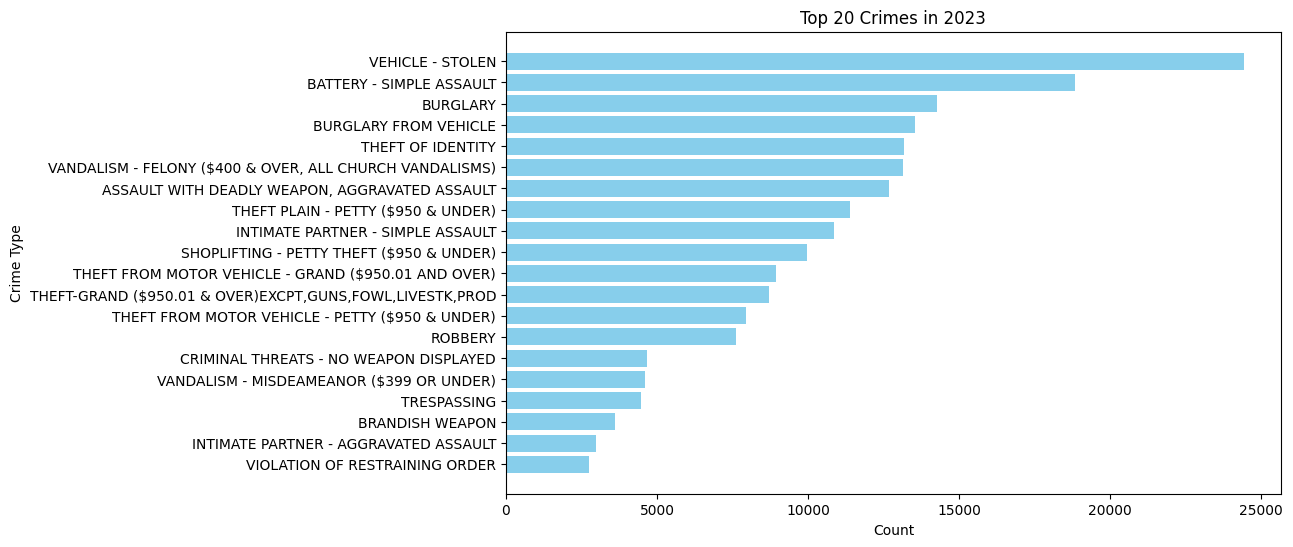

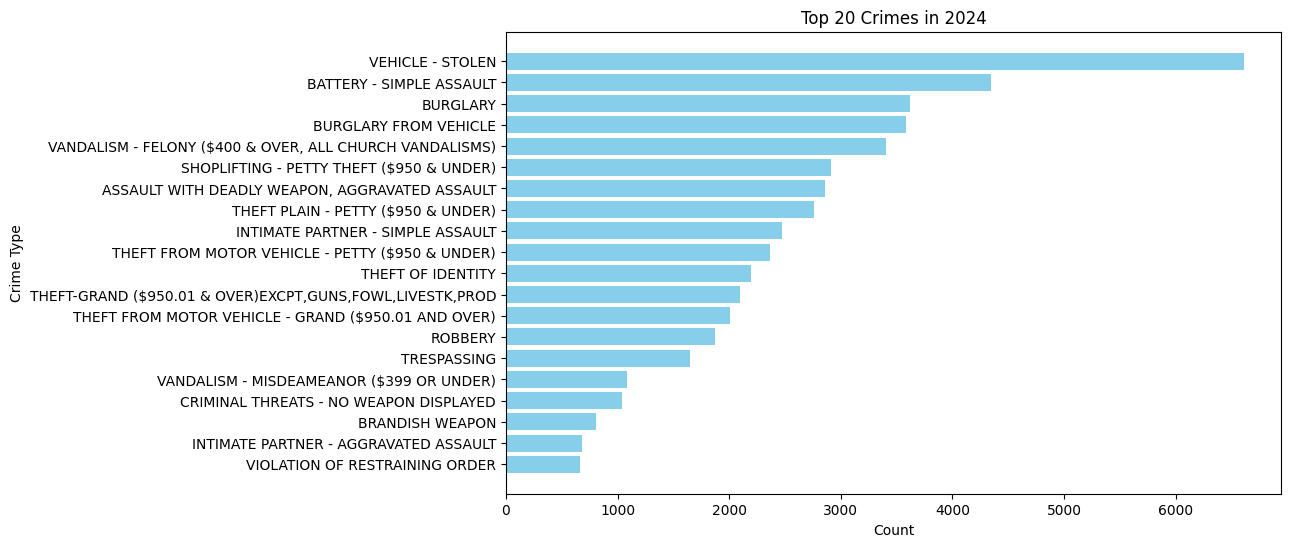

In [34]:
data2['Year'] = pd.to_datetime(data2['DATE OCC']).dt.year
crime_counts = data2.groupby(['Year', 'Crm Cd Desc']).size().reset_index(name='Count')
top_crimes = crime_counts.groupby('Year').apply(lambda x: x.nlargest(20, 'Count')).reset_index(drop=True)

for year, data2_year in top_crimes.groupby('Year'):
    plt.figure(figsize=(10, 6))
    plt.barh(data2_year['Crm Cd Desc'], data2_year['Count'], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Crime Type')
    plt.title(f'Top 20 Crimes in {year}')
    plt.gca().invert_yaxis()
    plt.show()


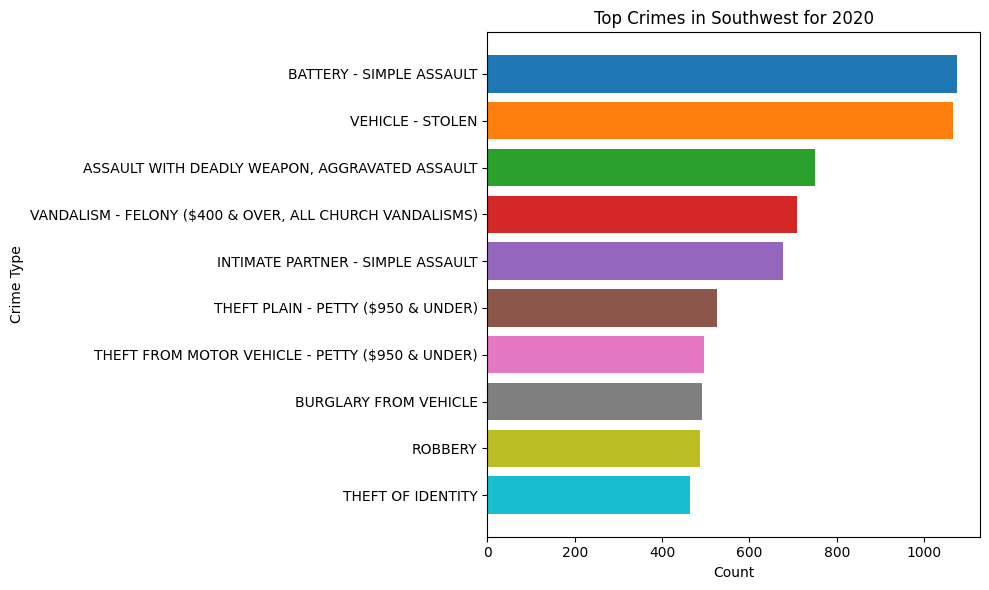

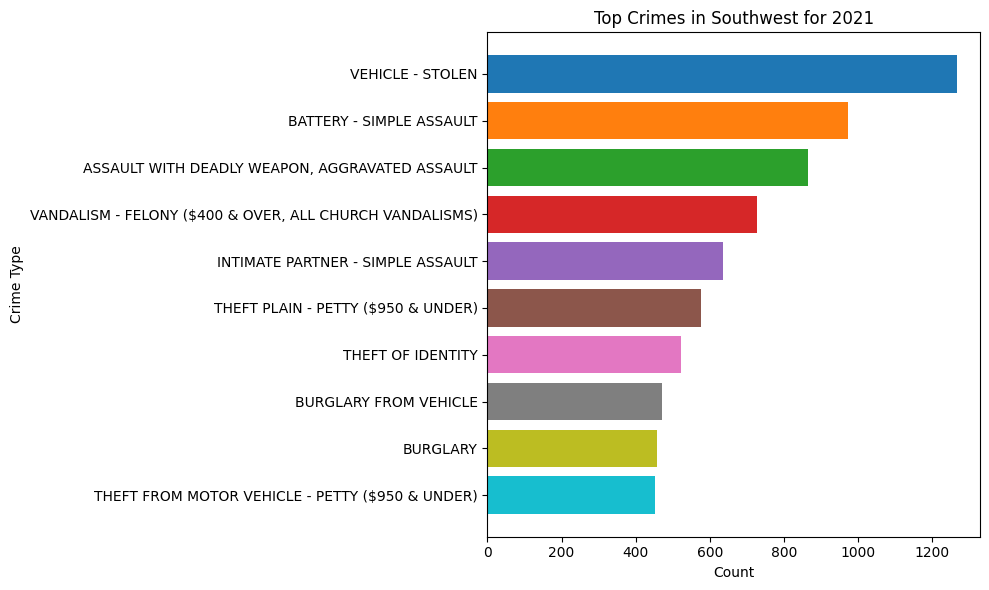

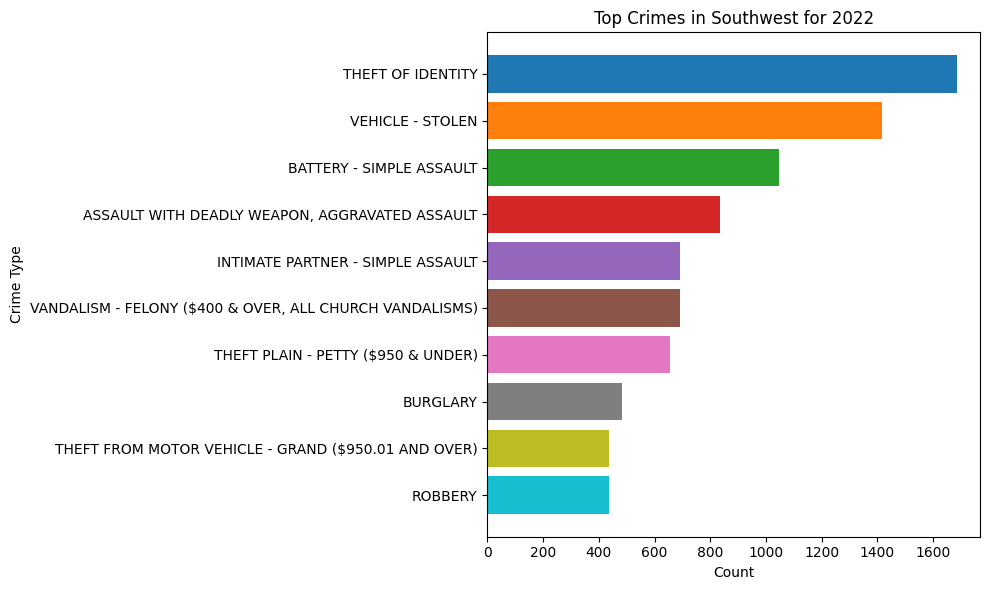

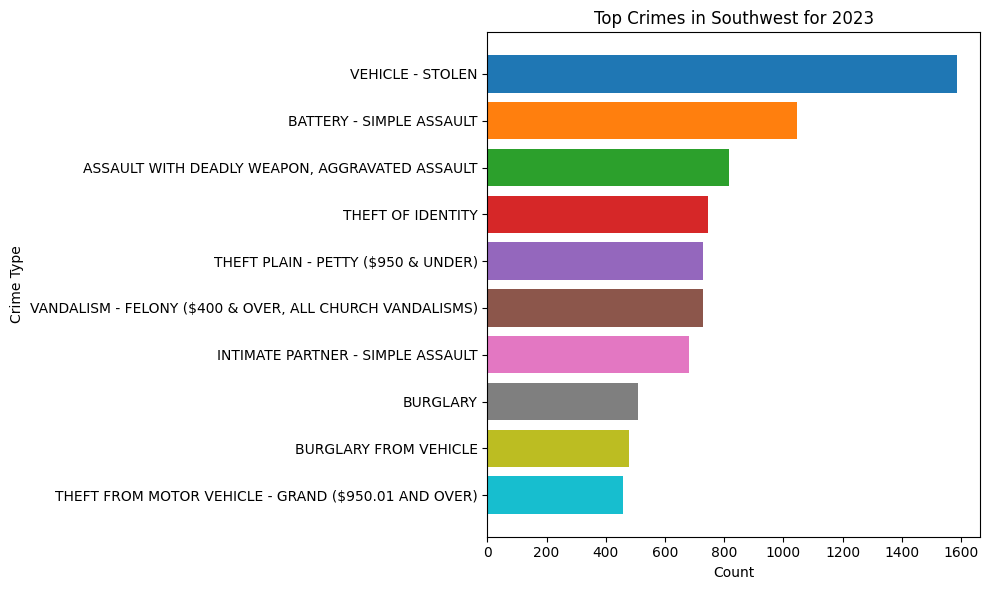

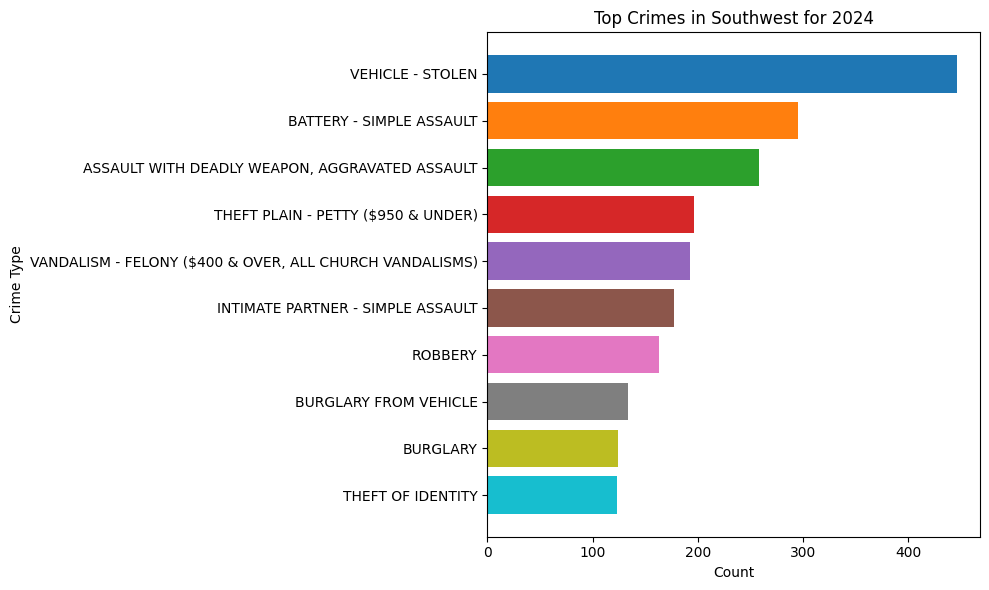

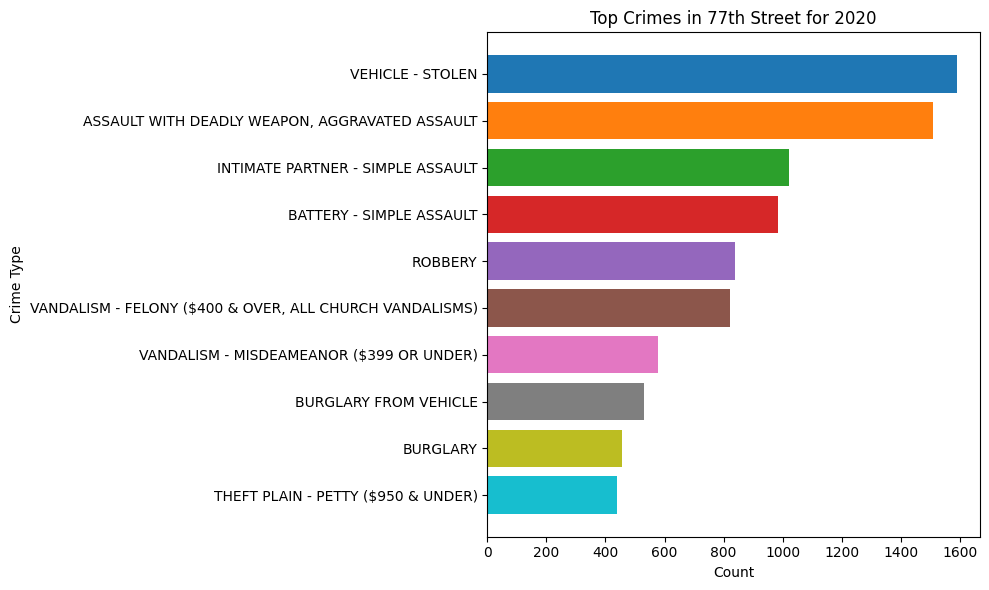

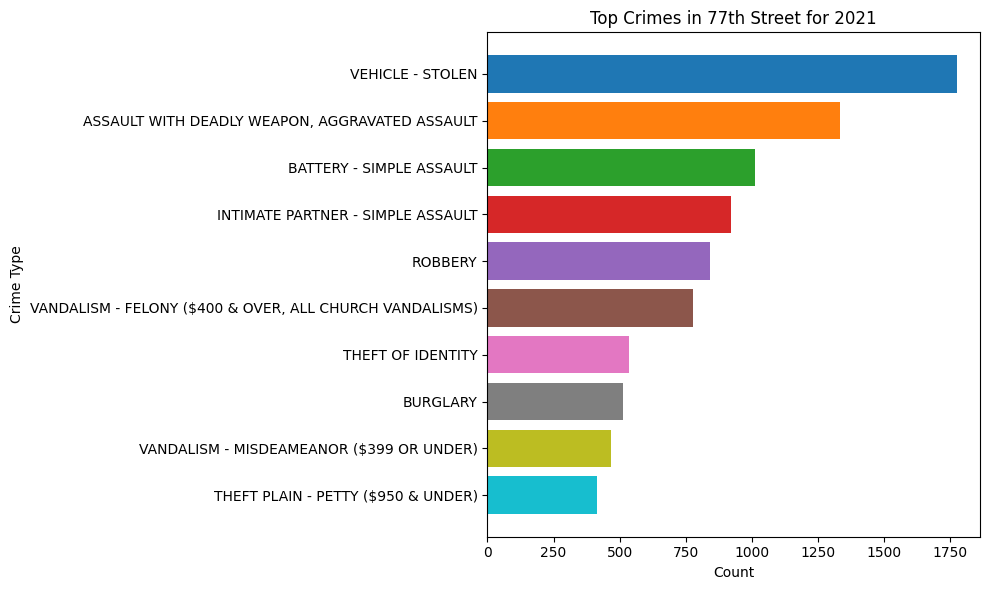

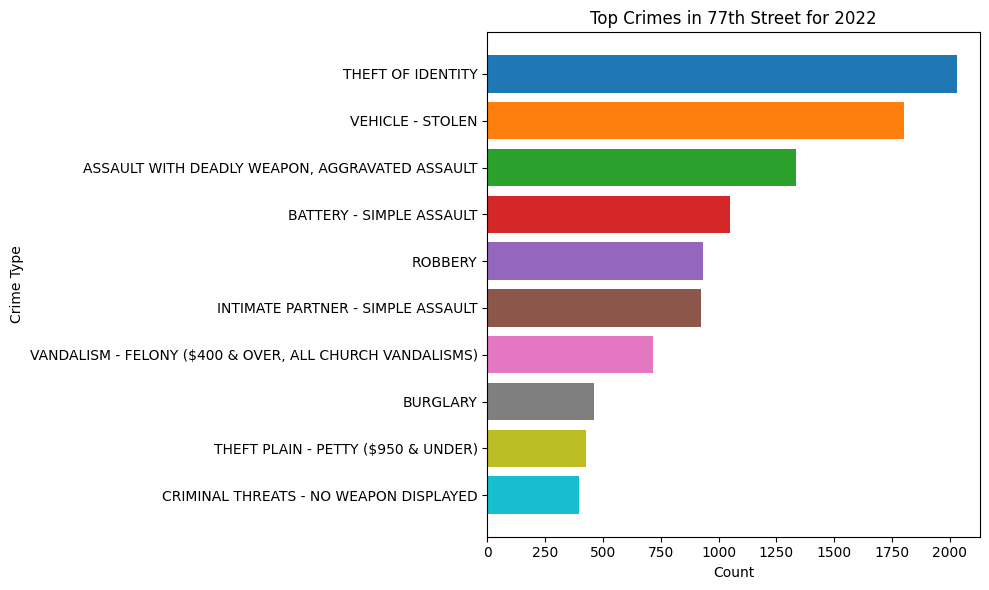

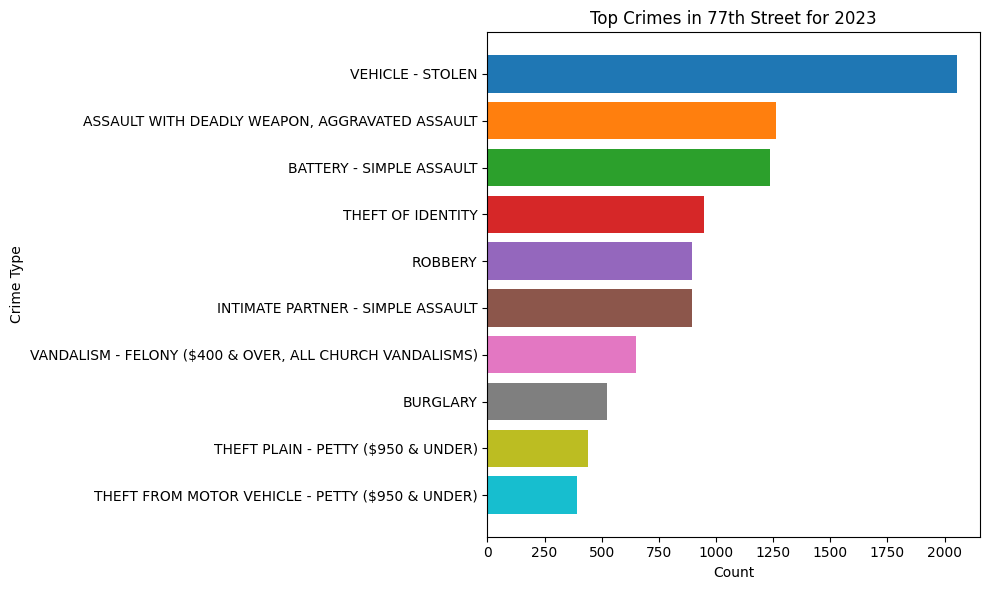

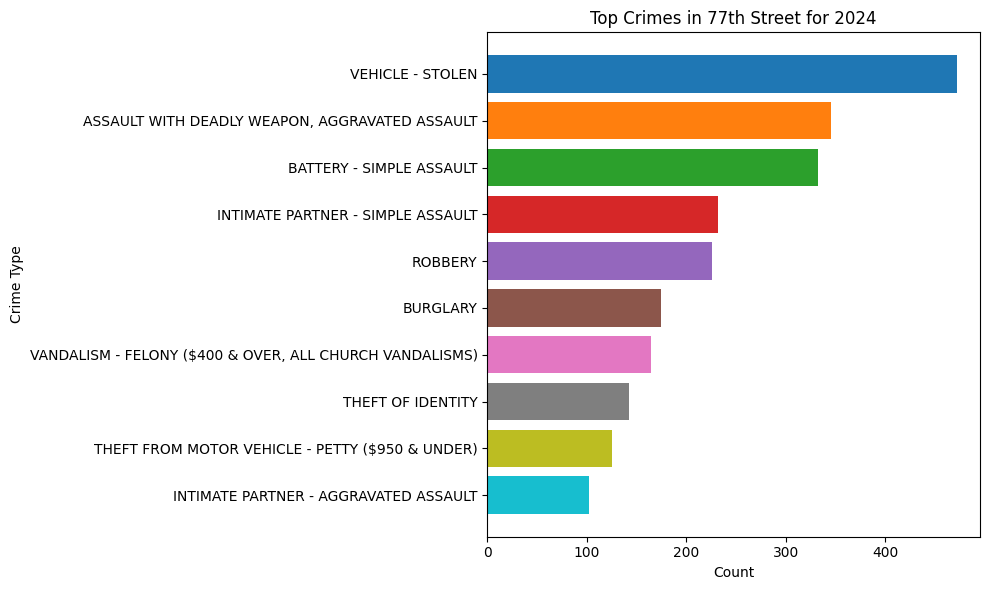

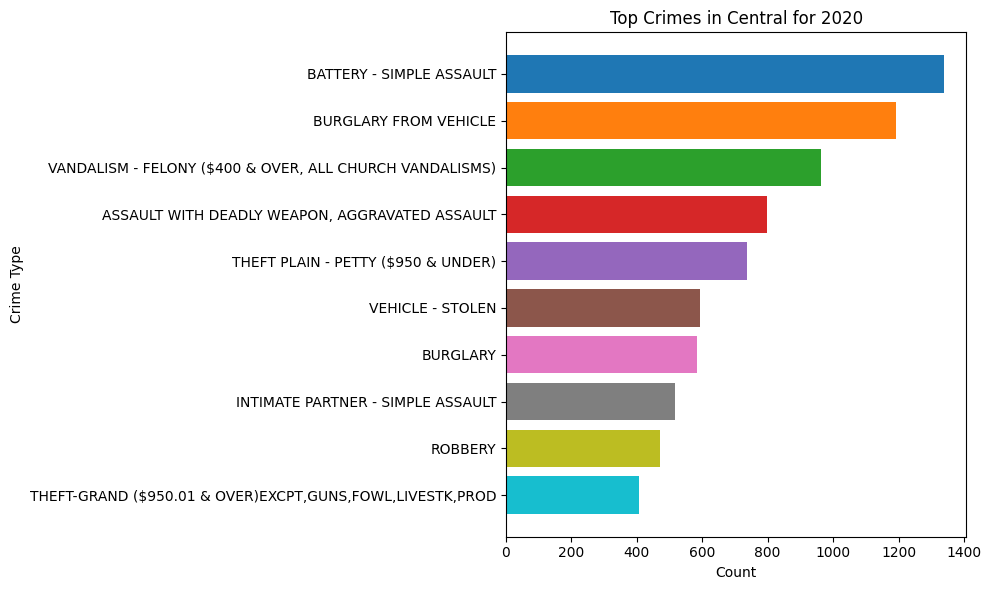

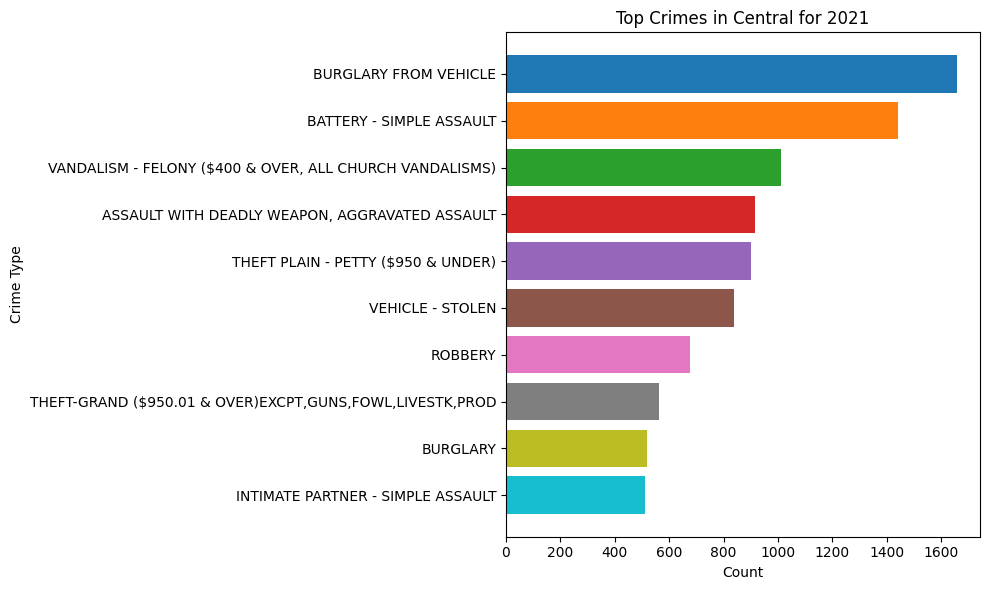

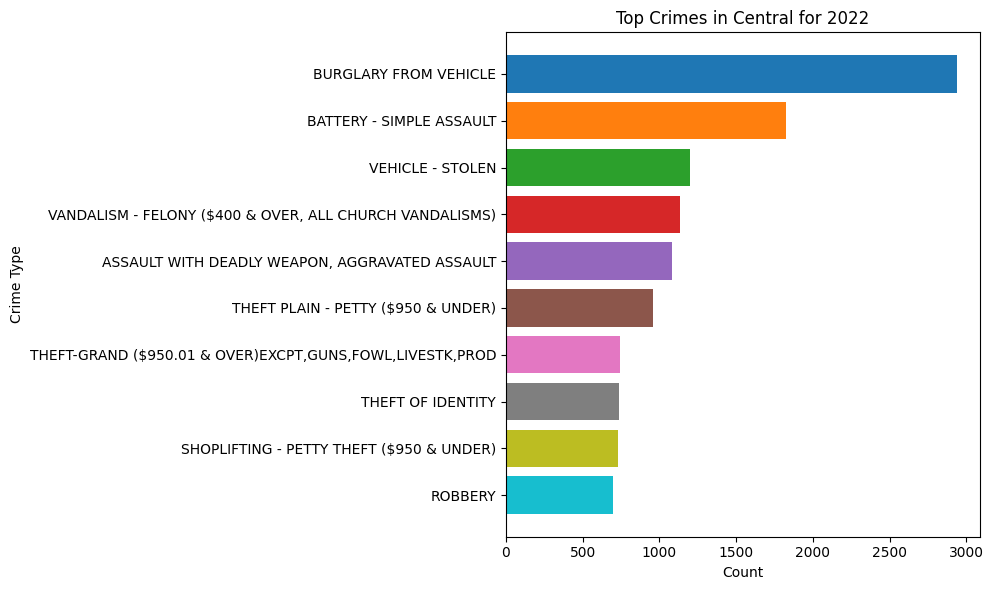

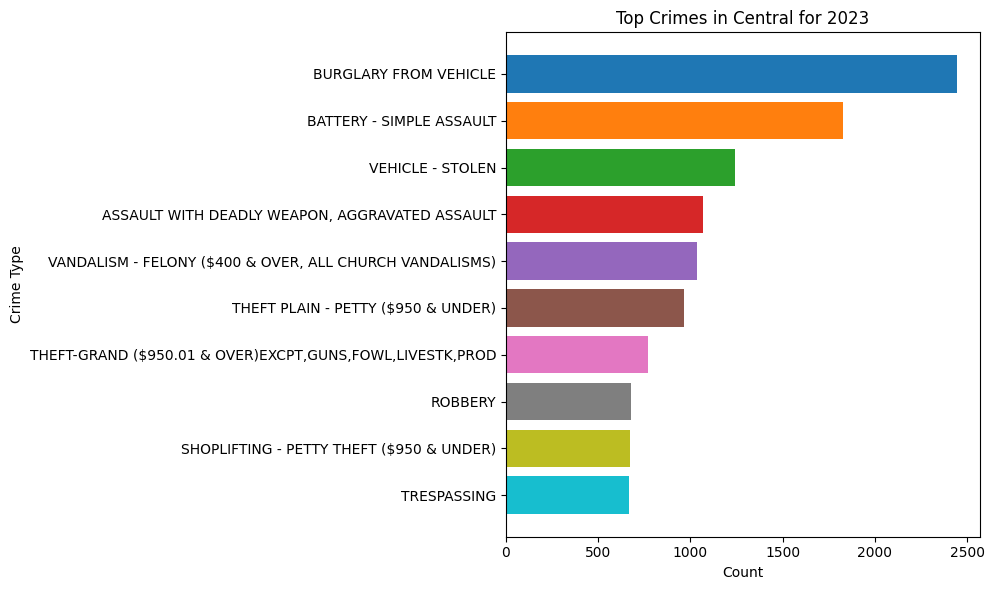

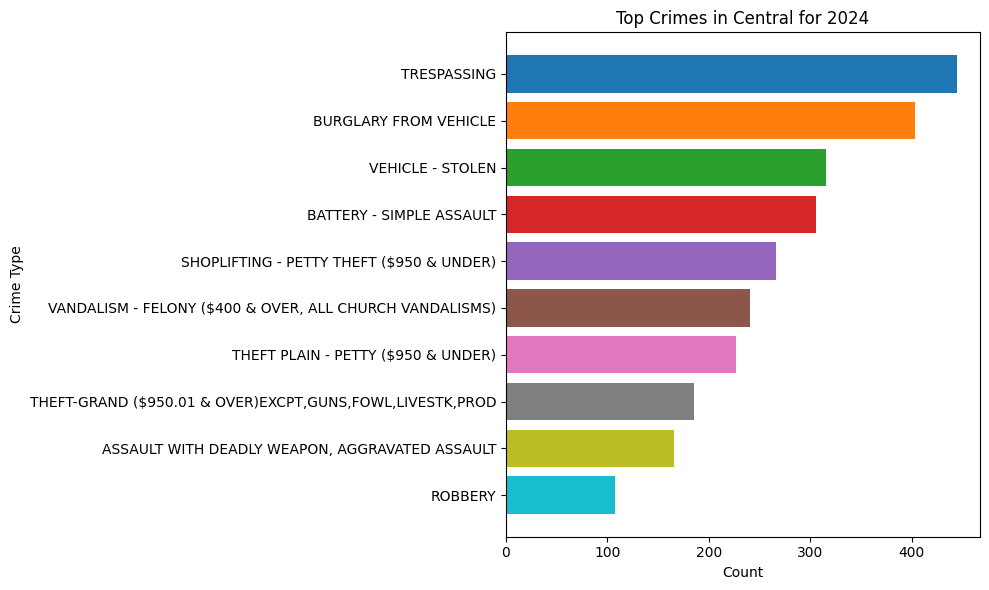

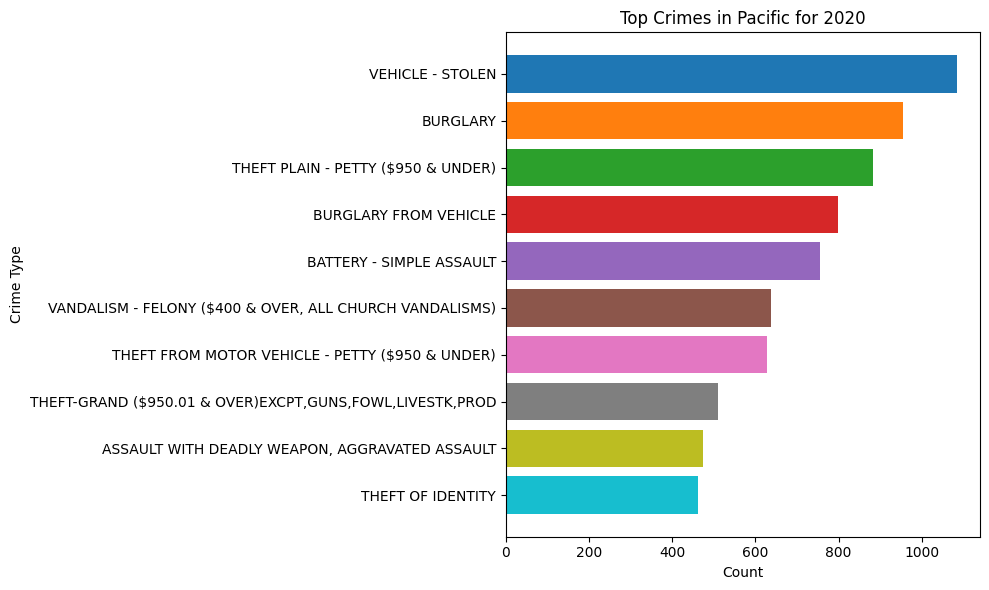

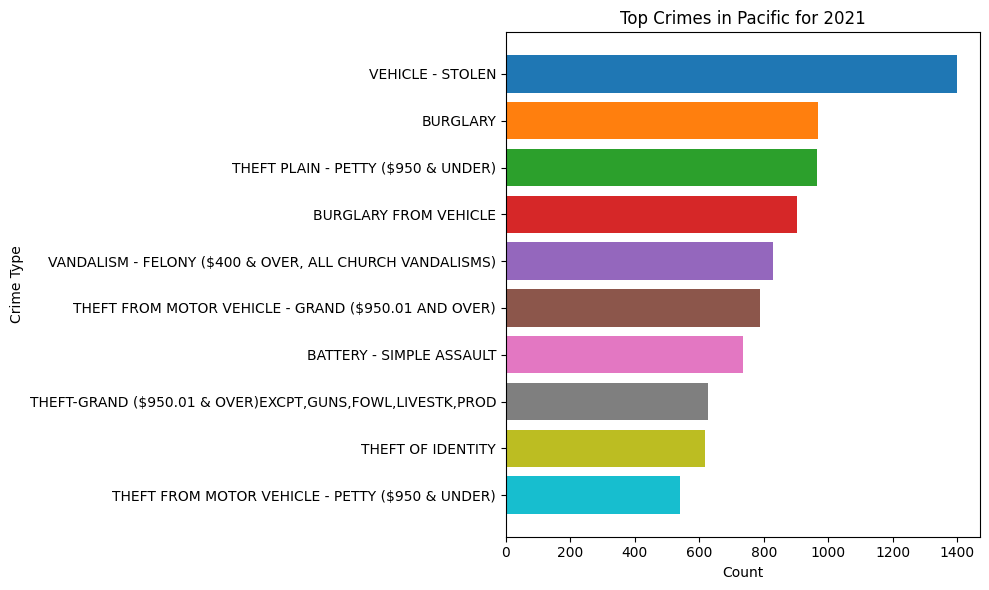

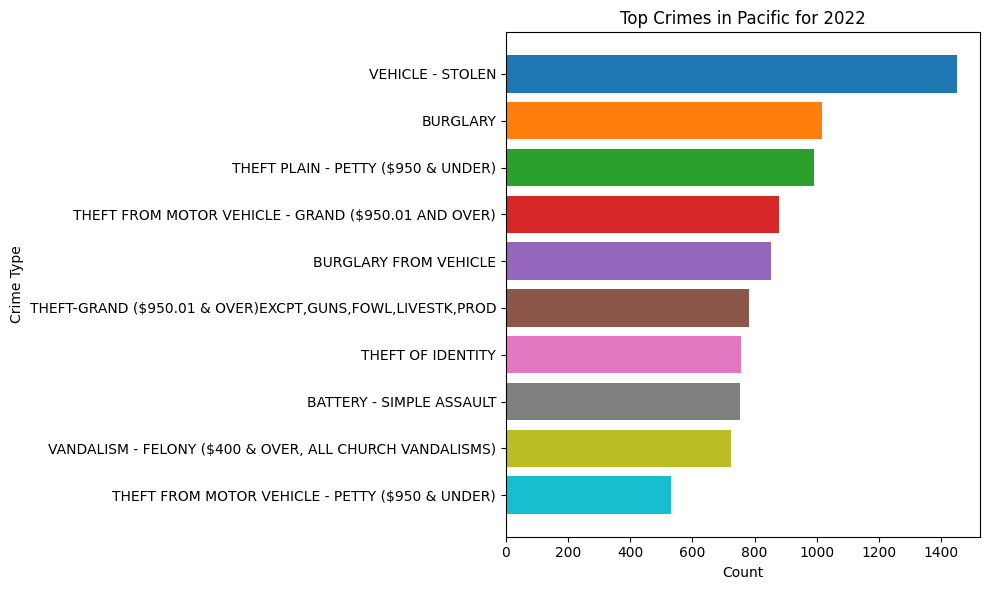

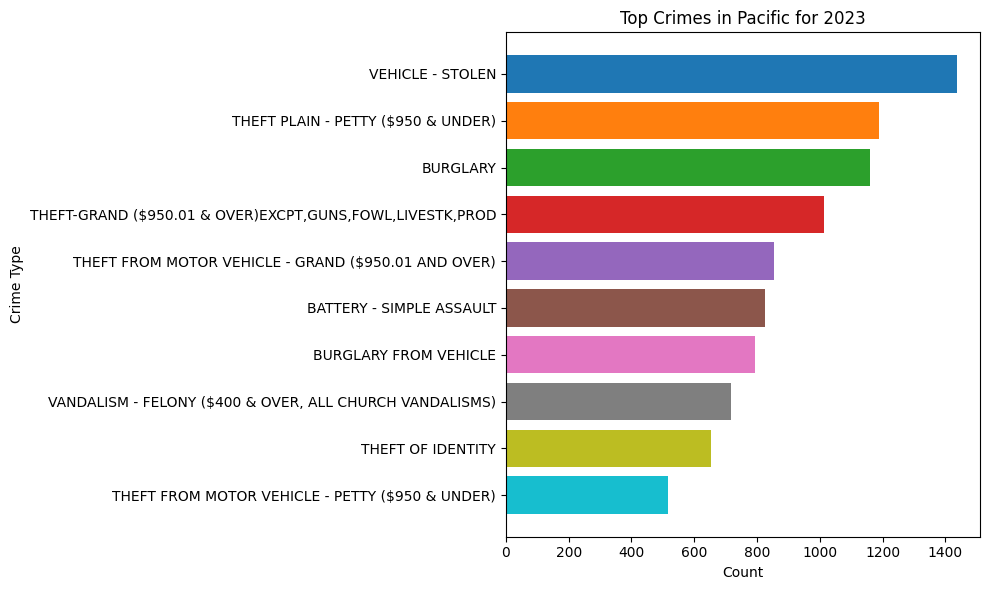

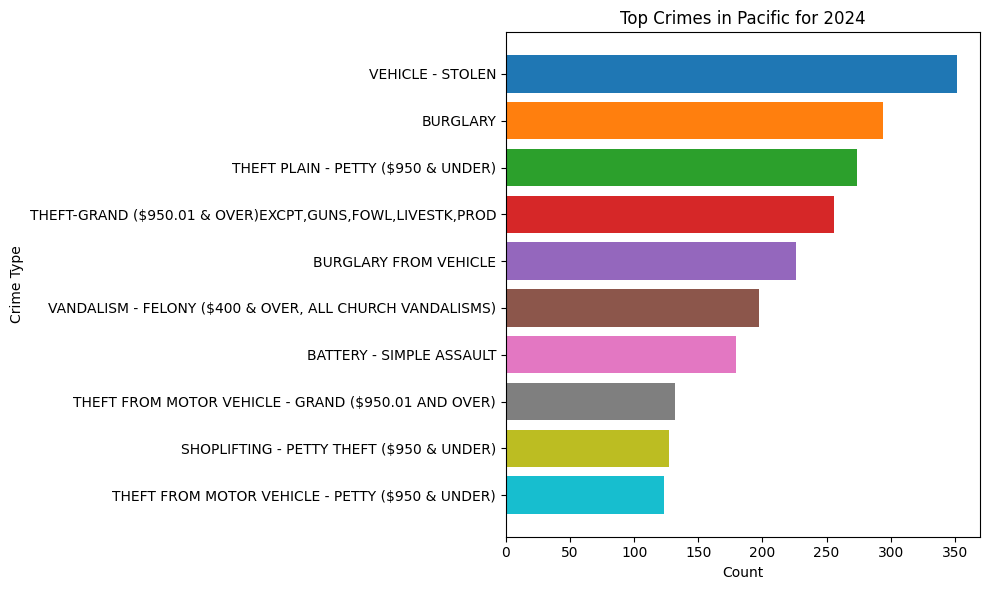

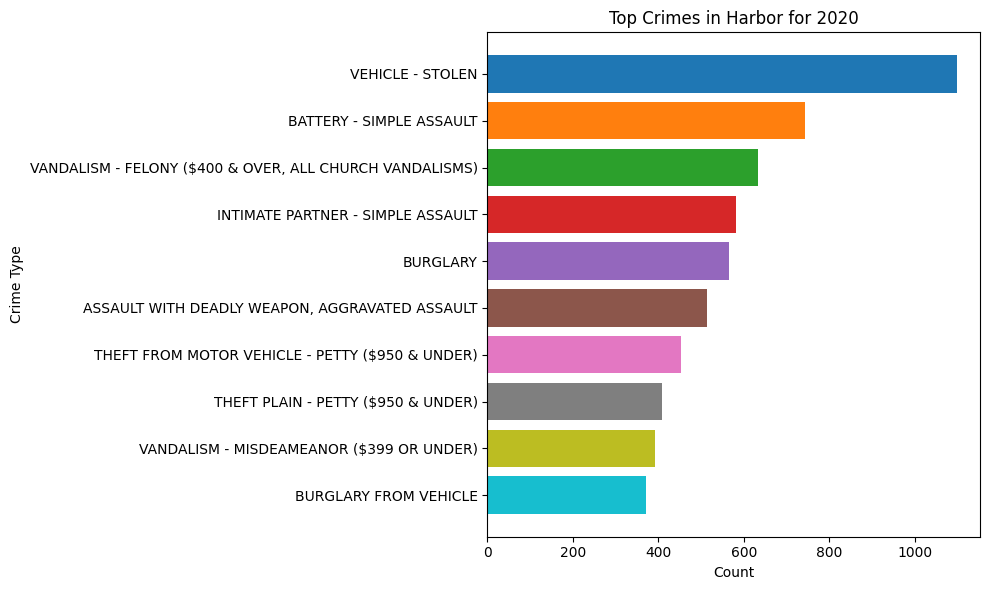

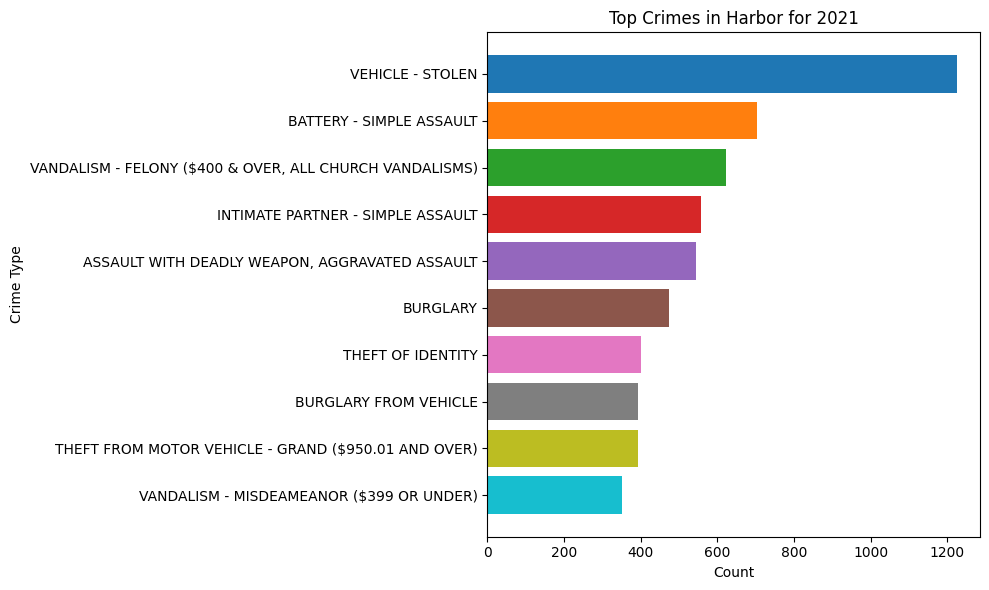

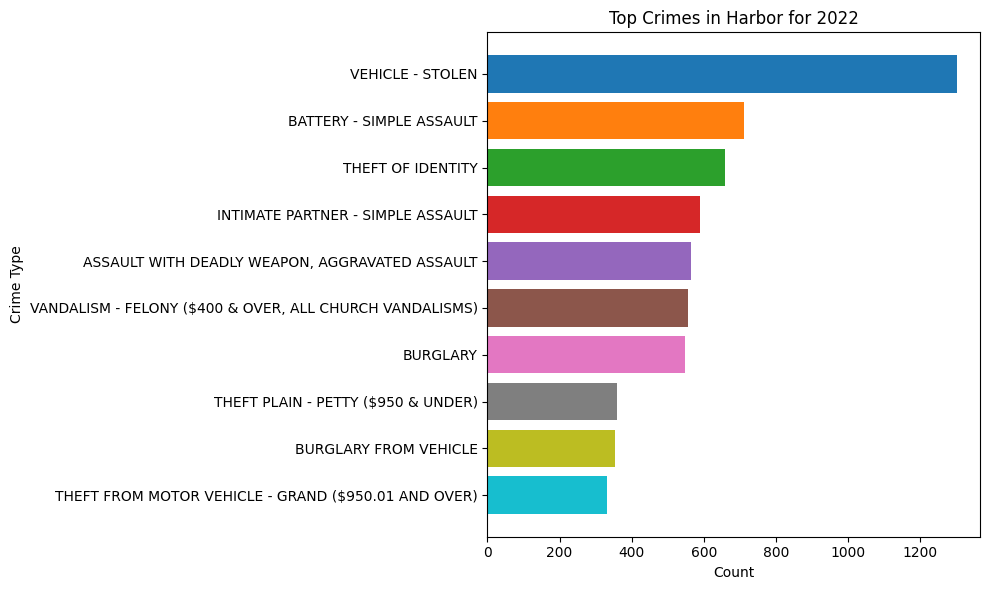

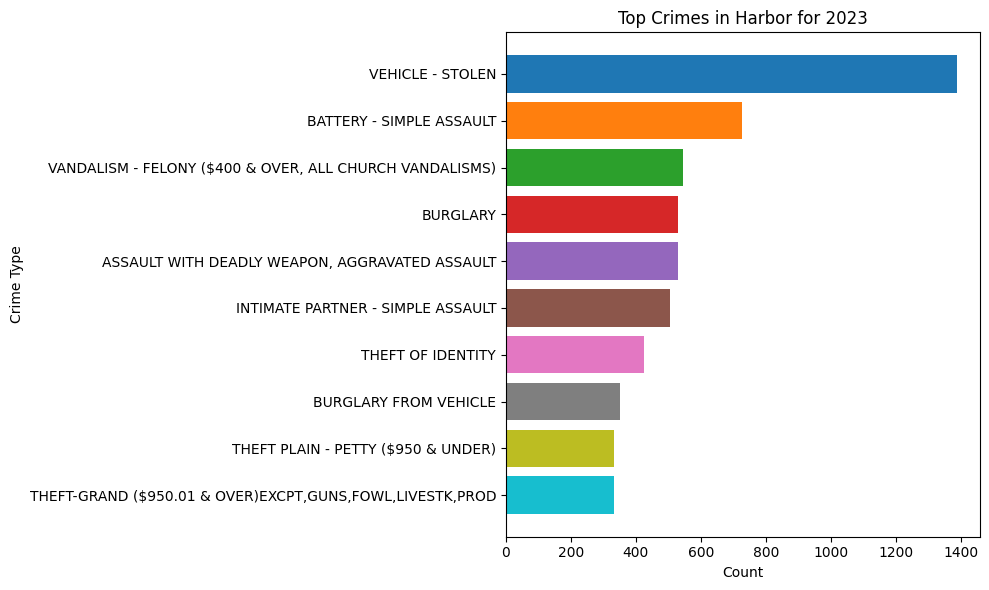

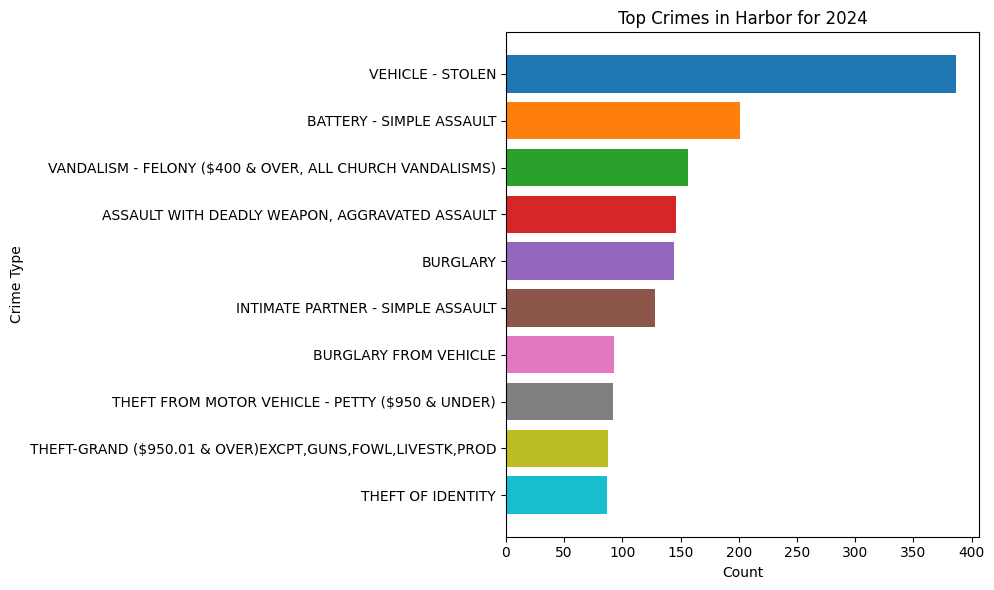

In [35]:
colors = plt.cm.tab10.colors
crime_counts = data2.groupby(['AREA NAME', 'Year', 'Crm Cd Desc']).size().reset_index(name='Count')
top_areas = crime_counts.groupby(['AREA NAME']).size().nlargest(5).index
top_crimes = crime_counts[crime_counts['AREA NAME'].isin(top_areas)]
years = top_crimes['Year'].unique()
for area in top_areas:
    area_data = top_crimes[top_crimes['AREA NAME'] == area]
    for year in years:
        year_data = area_data[area_data['Year'] == year]
        if not year_data.empty:
            top_10_crimes = year_data.nlargest(10, 'Count')
            plt.figure(figsize=(10, 6))
            for i, (crime, count) in enumerate(zip(top_10_crimes['Crm Cd Desc'], top_10_crimes['Count'])):
                plt.barh(crime, count, color=colors[i % len(colors)])
            plt.title(f'Top Crimes in {area} for {year}')
            plt.xlabel('Count')
            plt.ylabel('Crime Type')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

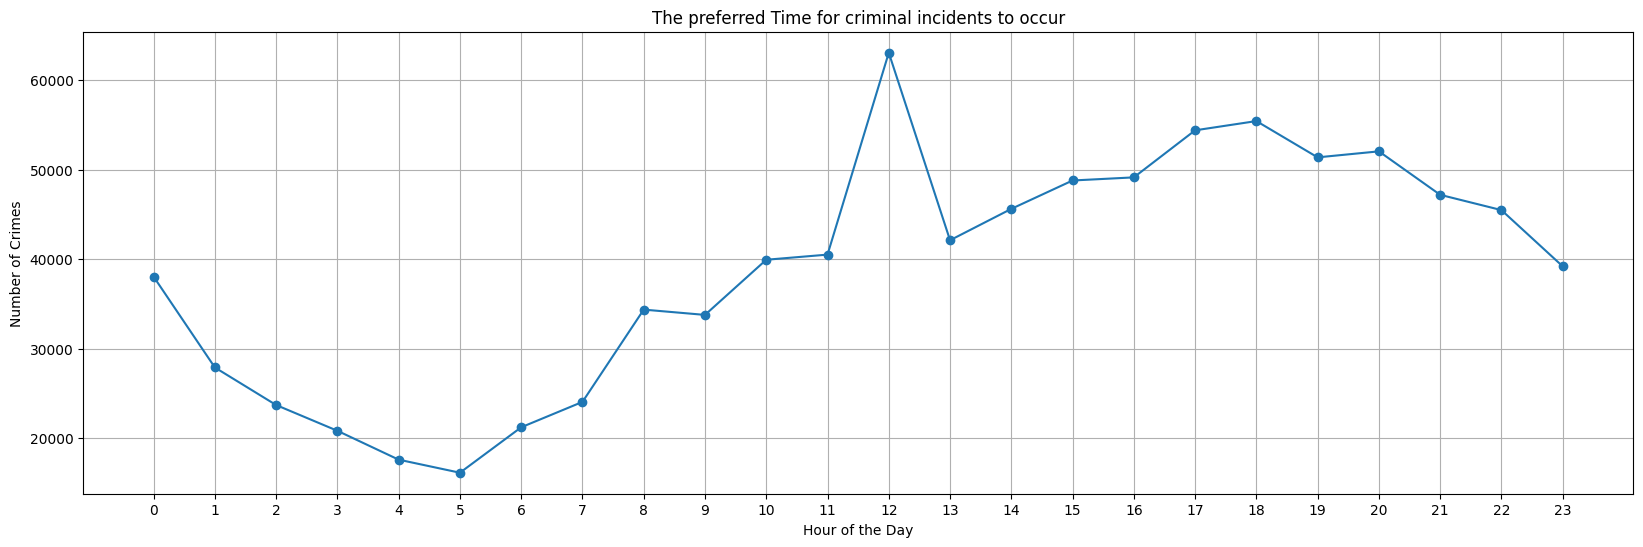

In [36]:
data2['TIME OCC'] = pd.to_datetime(data2['TIME OCC'], format='%H:%M:%S').dt.hour
crime_counts = data2['TIME OCC'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-')
plt.title('The preferred Time for criminal incidents to occur')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

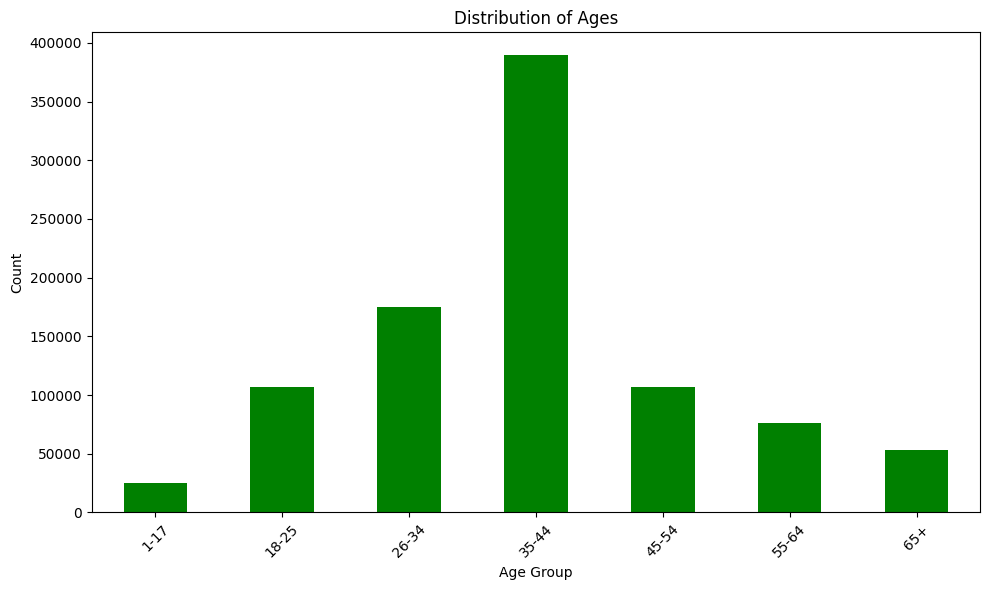

In [37]:
data2['Ages'] = pd.cut(data2['Vict Age'], bins=[1, 17, 25, 34, 44, 54, 64, np.inf], labels=["1-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
ages_counts = data2['Ages'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ages_counts.plot(kind='bar', color='green')
plt.title('Distribution of Ages')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
data2.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Status', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON', 'Year', 'Ages'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
categorical_features = data2.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if data2[feature].dtype == 'object':
        label_encoder = LabelEncoder()
        data2[feature] = label_encoder.fit_transform(data2[feature])

In [40]:
data2=data2.drop('Ages',axis=1)

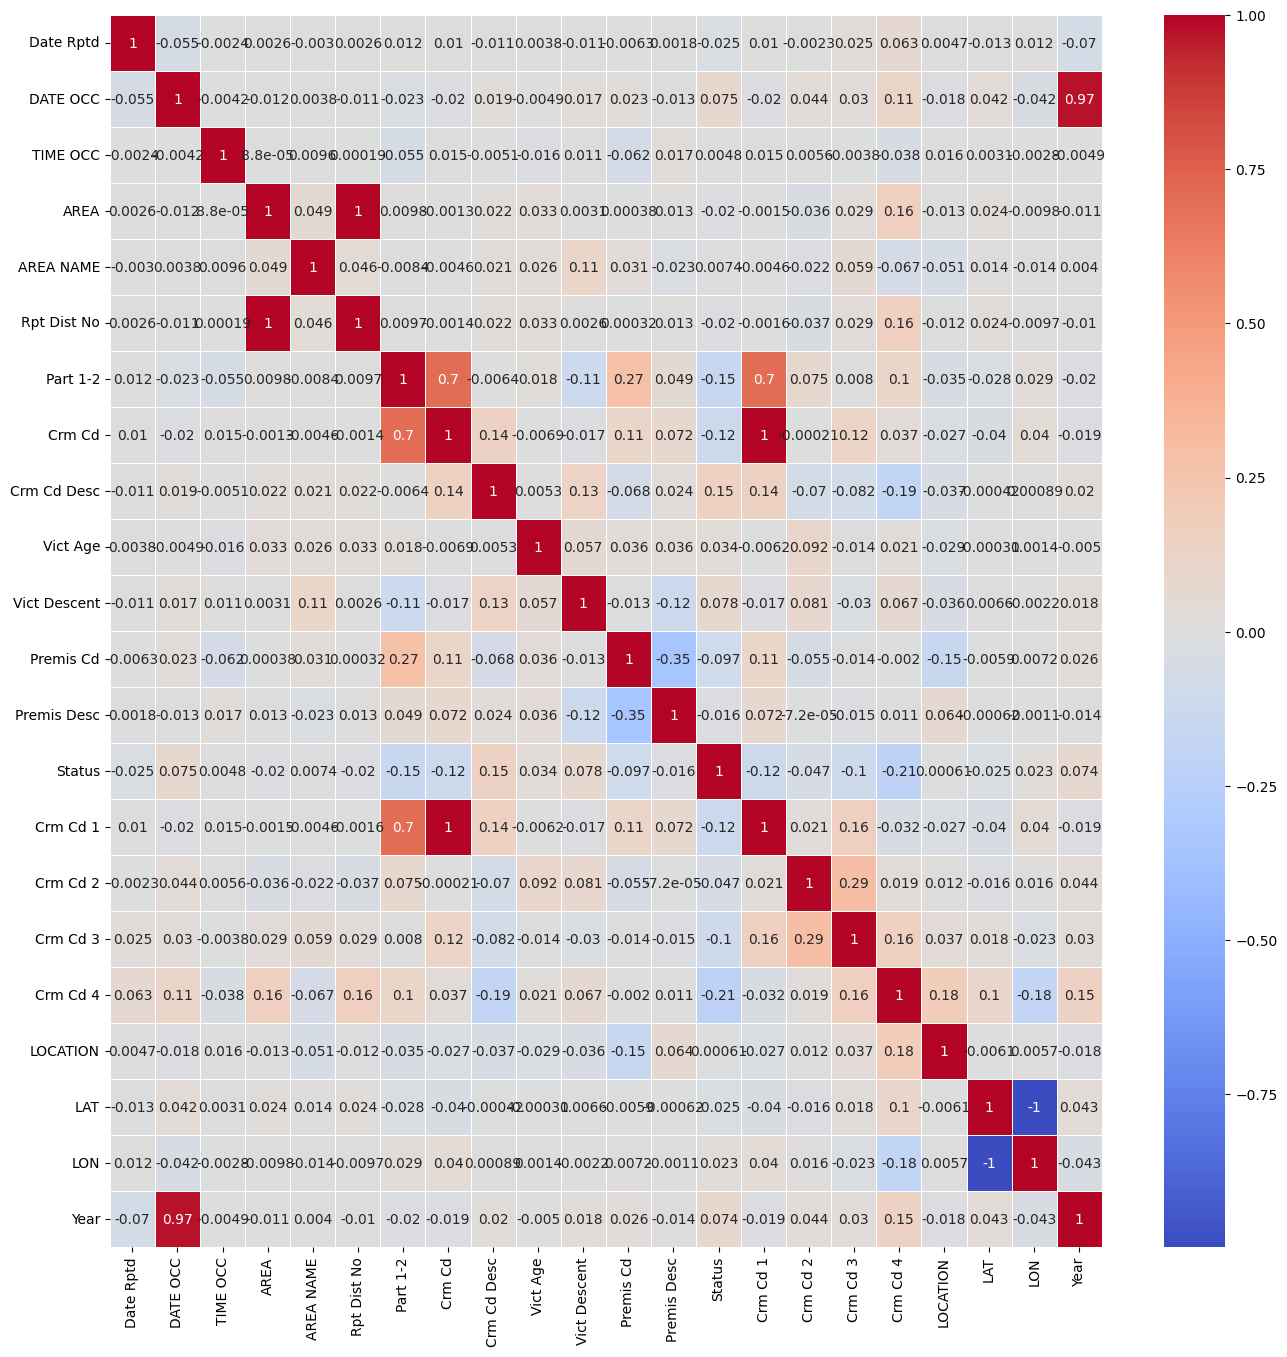

In [41]:
plt.figure(figsize=(16, 16))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [42]:
sample_size = 100000
shuffled_data = data2.sample(frac=1, random_state=42)
sampled_data = shuffled_data.head(sample_size)

In [43]:
X = sampled_data[['Crm Cd','Premis Cd','TIME OCC','Date Rptd','AREA','Vict Age','LON']]
y = sampled_data['Part 1-2']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X, y, random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X, y)
predictions=rf.predict(X_test)

In [46]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-Score:", f1_score * 100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1-Score: 100.0


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
predictions = dt.predict(X_test)


In [50]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


## For Purely Unseen Data

In [51]:
data3 = data2.tail(10000)
X = data3[['Crm Cd','Premis Cd','TIME OCC','Date Rptd','AREA','Vict Age','LON']]
y = data3['Part 1-2']

In [52]:
X_train, X_test, y_train, Y_test = train_test_split(X, y, random_state=1)

In [53]:
rf_predictions=rf.predict(X_test)

In [54]:
accuracy = accuracy_score(Y_test, rf_predictions)
precision = precision_score(Y_test, rf_predictions)
recall = recall_score(Y_test, rf_predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)

Accuracy: 99.76
Precision: 99.8069498069498
Recall: 99.8069498069498


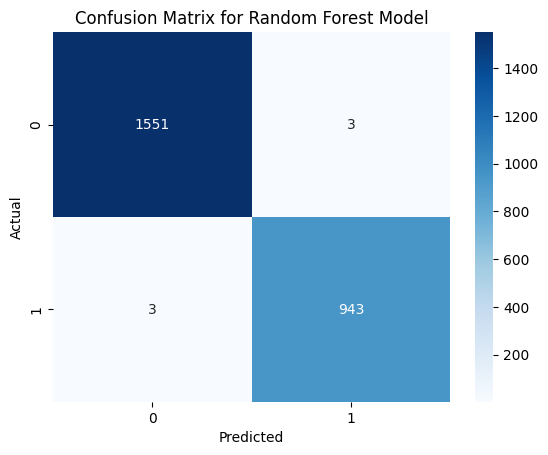

In [55]:
conf_matrix = confusion_matrix(Y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [56]:
dt_predictions=dt.predict(X_test)

In [57]:
accuracy = accuracy_score(Y_test, dt_predictions)
precision = precision_score(Y_test, dt_predictions)
recall = recall_score(Y_test, dt_predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


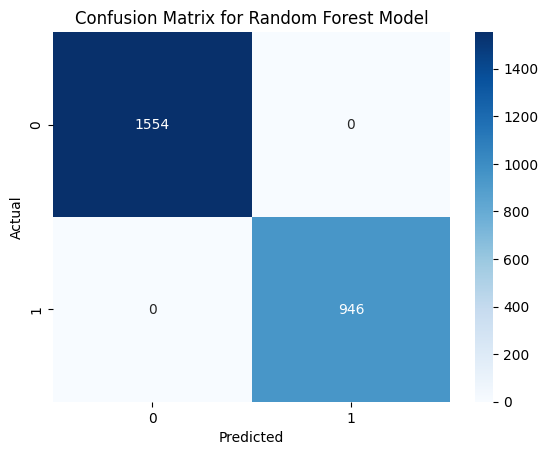

In [58]:
conf_matrix = confusion_matrix(Y_test, dt_predictions)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [59]:
data3=sampled_data.drop(['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4'],axis=1)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

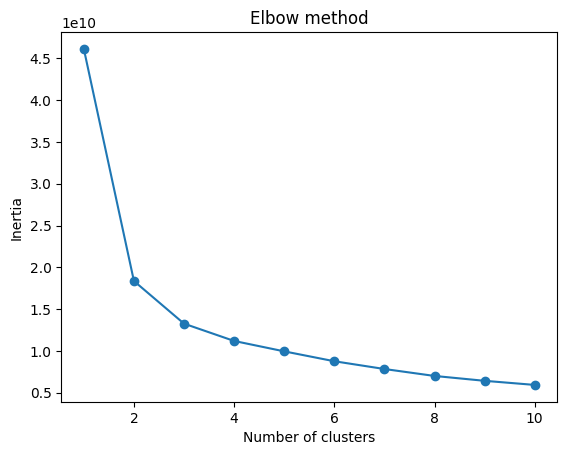

In [60]:
numeric_data = data3.select_dtypes(include=['int64', 'float64'])

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(numeric_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [61]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(numeric_data)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [62]:
numeric_data.columns

Index(['AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd',
       'LAT', 'LON'],
      dtype='object')

In [63]:
X = numeric_data['AREA']
y = numeric_data['Crm Cd']

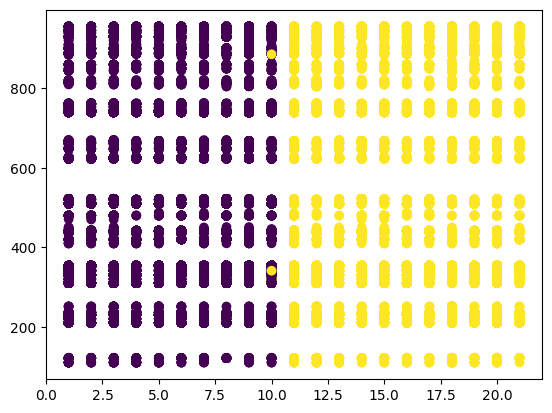

In [64]:
plt.scatter(X,y,c=kmeans.labels_)
plt.show()